In [55]:
library(dplyr)
library(Seurat)
library(patchwork)
library(hdf5r)
library(ggplot2)

In [2]:
m1m2.data <- Read10X_h5("data/GSM4674661_CM1_CM2_filtered_feature_bc_matrix.h5")
m1m2 <- CreateSeuratObject(counts = m1m2.data, project = "moderate", min.cells = 3, min.features = 200)
m3m4.data <- Read10X_h5("data/GSM4674662_CM3_CM4_filtered_feature_bc_matrix.h5")
m3m4 <- CreateSeuratObject(counts = m3m4.data, project = "moderate", min.cells = 3, min.features = 200)
m5.data <- Read10X_h5("data/GSM4674663_CM5_filtered_feature_bc_matrix.h5")
m5 <- CreateSeuratObject(counts = m5.data, project = "moderate", min.cells = 3, min.features = 200) 

moderate <- merge(m1m2, y = c(m3m4,m5), add.cell.ids = c("m1m2", "m3m4", "m5"), project = "moderate")
moderate

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


An object of class Seurat 
18801 features across 24685 samples within 1 assay 
Active assay: RNA (18801 features, 0 variable features)

In [3]:
s7s8.data <- Read10X_h5("data/GSM4674664_CS7_CS8_filtered_feature_bc_matrix.h5")
s7s8 <- CreateSeuratObject(counts = s7s8.data, project = "severe", min.cells = 3, min.features = 200)
s9s10.data <- Read10X_h5("data/GSM4674665_CS9_CS10_filtered_feature_bc_matrix.h5")
s9s10 <- CreateSeuratObject(counts = s9s10.data, project = "severe", min.cells = 3, min.features = 200)
s11s12.data <- Read10X_h5("data/GSM4674666_CS11_CS12_filtered_feature_bc_matrix.h5")
s11s12 <- CreateSeuratObject(counts = s11s12.data, project = "severe", min.cells = 3, min.features = 200) 

severe <- merge(s7s8, y = c(s9s10,s11s12), add.cell.ids = c("s7s8", "s9s10", "s11s12"), project = "severe")
severe

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


An object of class Seurat 
18136 features across 18623 samples within 1 assay 
Active assay: RNA (18136 features, 0 variable features)

In [4]:
r13r14.data <- Read10X_h5("data/GSM4674667_CR13_CR14_filtered_feature_bc_matrix.h5")
r13r14 <- CreateSeuratObject(counts = r13r14.data, project = "recover", min.cells = 3, min.features = 200)
r15r16.data <- Read10X_h5("data/GSM4674668_CR15_CR16_filtered_feature_bc_matrix.h5")
r15r16 <- CreateSeuratObject(counts = r15r16.data, project = "recover", min.cells = 3, min.features = 200)
r17r18.data <- Read10X_h5("data/GSM4674669_CR17_CR18_filtered_feature_bc_matrix.h5")
r17r18 <- CreateSeuratObject(counts = r17r18.data, project = "recover", min.cells = 3, min.features = 200) 

recover <- merge(r13r14, y = c(r15r16,r17r18), add.cell.ids = c("r13r14", "r15r16", "r17r18"), project = "recover")
recover

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


An object of class Seurat 
19797 features across 34389 samples within 1 assay 
Active assay: RNA (19797 features, 0 variable features)

## QC and selecting cells

In [5]:
moderate[["percent.mt"]] <- PercentageFeatureSet(moderate, pattern = "^MT-")
severe[["percent.mt"]] <- PercentageFeatureSet(severe, pattern = "^MT-")
recover[["percent.mt"]] <- PercentageFeatureSet(recover, pattern = "^MT-")

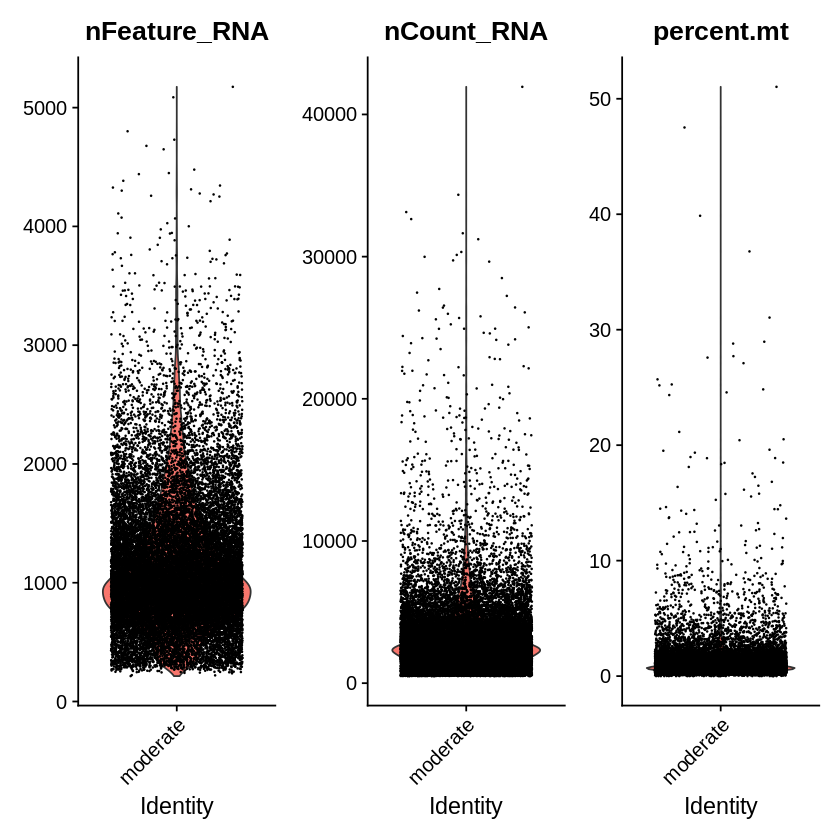

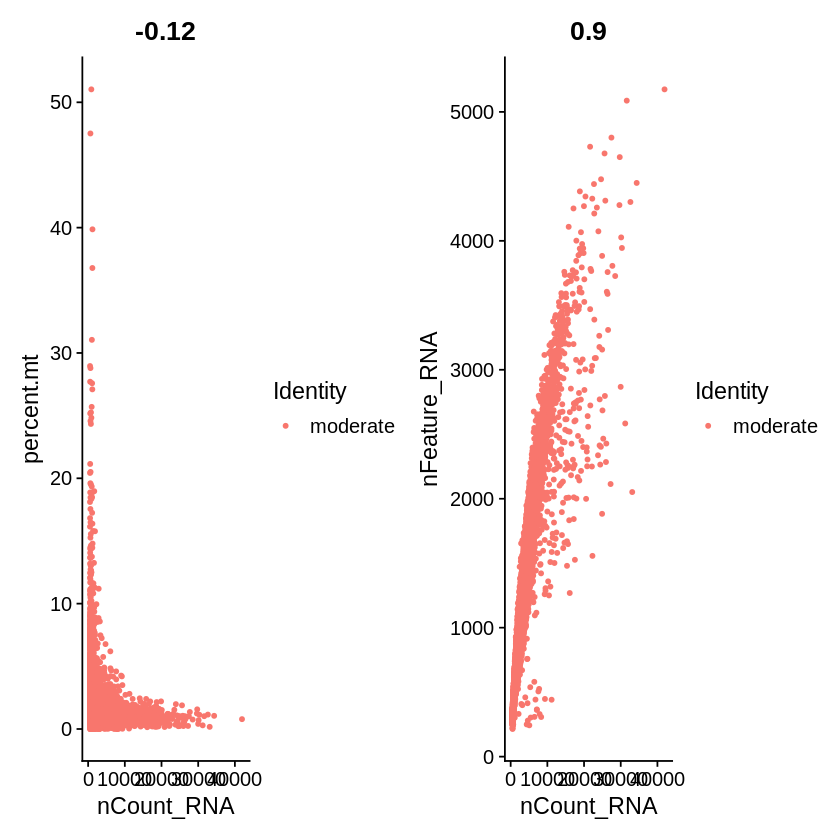

In [6]:
moderate[["percent.mt"]] <- PercentageFeatureSet(moderate, pattern = "^MT-")
VlnPlot(moderate, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(moderate, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(moderate, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

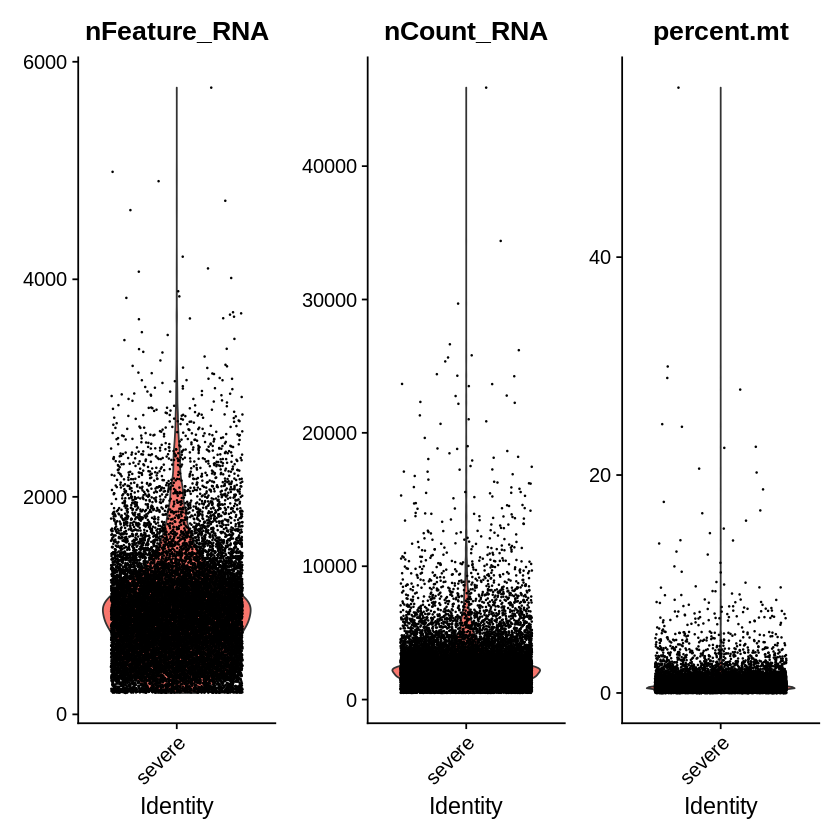

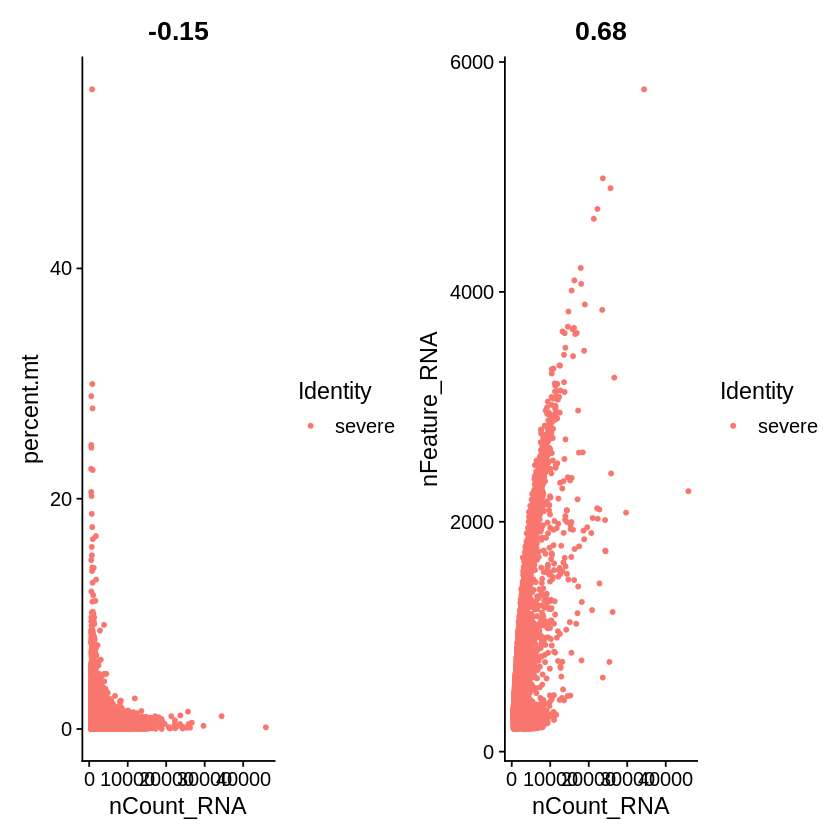

In [7]:
severe[["percent.mt"]] <- PercentageFeatureSet(severe, pattern = "^MT-")
VlnPlot(severe, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(severe, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(severe, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

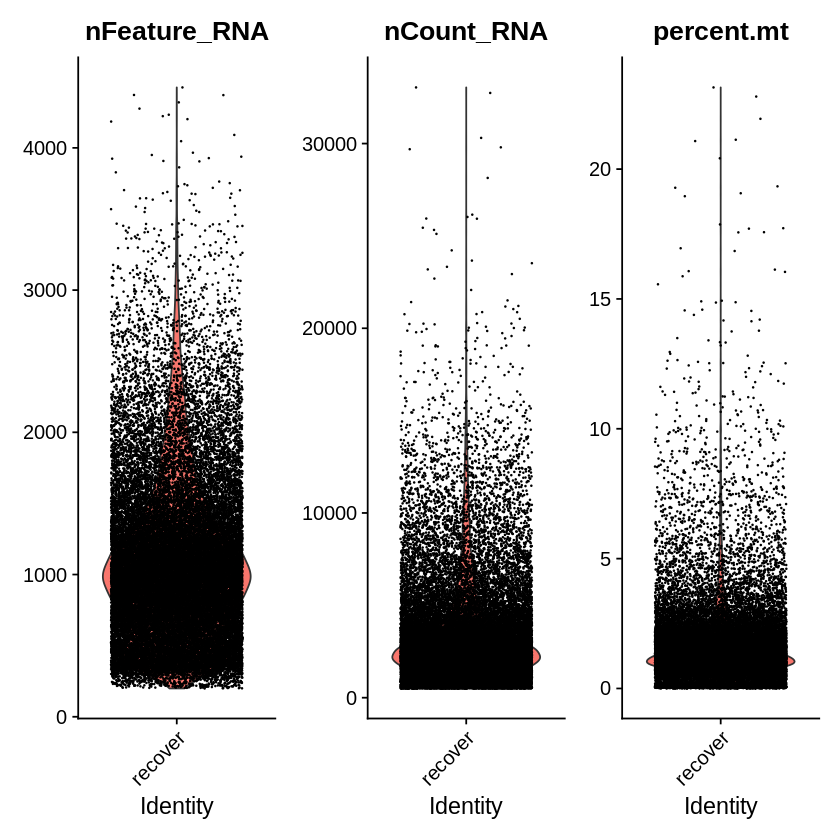

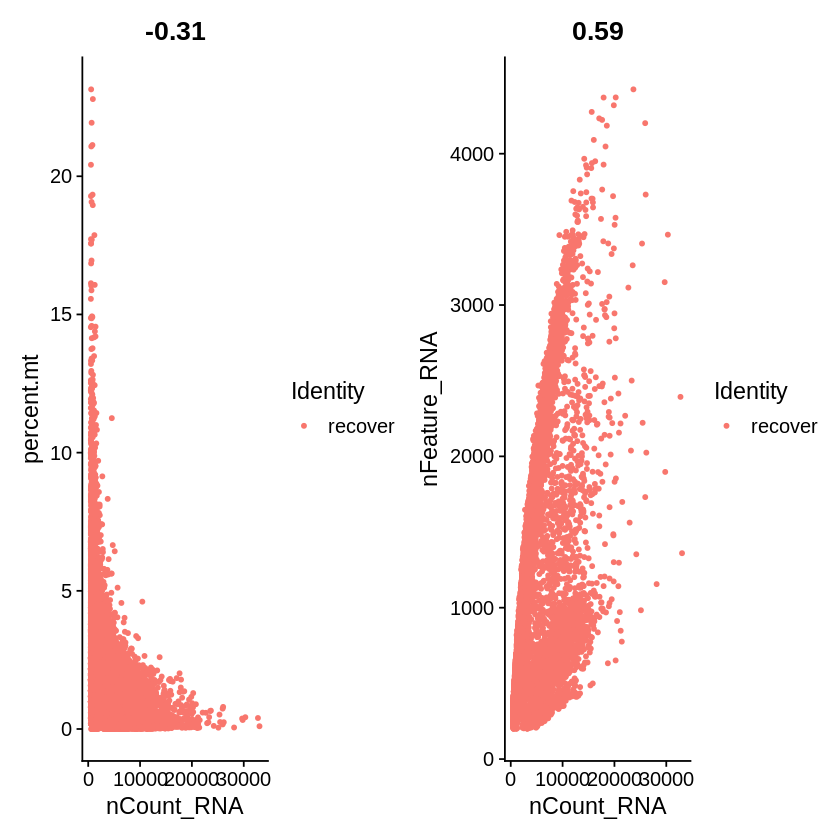

In [8]:
recover[["percent.mt"]] <- PercentageFeatureSet(recover, pattern = "^MT-")
VlnPlot(recover, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(recover, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(recover, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [9]:
moderate <- subset(moderate, subset = nCount_RNA < 20000 & percent.mt < 20)
severe <- subset(severe, subset = nCount_RNA < 20000 & percent.mt < 20)
recover <- subset(recover, subset = nCount_RNA < 20000 & percent.mt < 20)

In [13]:
print(moderate)
print(severe)
print(recover)

An object of class Seurat 
18801 features across 24600 samples within 1 assay 
Active assay: RNA (18801 features, 0 variable features)
An object of class Seurat 
18136 features across 18590 samples within 1 assay 
Active assay: RNA (18136 features, 0 variable features)
An object of class Seurat 
19797 features across 34343 samples within 1 assay 
Active assay: RNA (19797 features, 0 variable features)


## Merging More Than Two Seurat Objects

In [14]:
all <- merge(moderate, y = c(severe,recover), add.cell.ids = c("mod", "sev", "rec"), project = "all")
all

An object of class Seurat 
20508 features across 77533 samples within 1 assay 
Active assay: RNA (20508 features, 0 variable features)

In [15]:
all.list <- SplitObject(all, split.by = "orig.ident")
all.list <- lapply(X = all.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 5000)
    all.genes <- rownames(x)
    x <- ScaleData(x, features = all.genes)
})
# select features that are repeatedly variable across datasets for integration
#defalut  nfeatures = 2000
all_features <- SelectIntegrationFeatures(object.list = all.list)

Centering and scaling data matrix

Centering and scaling data matrix

Centering and scaling data matrix



In [ ]:
all.anchors <- FindIntegrationAnchors(object.list = all.list, anchor.features = all_features)
all.combined <- IntegrateData(anchorset = all.anchors)
#saveRDS(all.combined, file = "all.combined.rds")

## Find cluster and annotation

In [103]:
#select default assay RNA or integrated
DefaultAssay(all.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
all.combined <- ScaleData(all.combined, verbose = FALSE)
all.combined <- RunPCA(all.combined, npcs = 30, verbose = FALSE)
all.combined <- RunUMAP(all.combined, reduction = "pca", dims = 1:29)
all.combined <- FindNeighbors(all.combined, reduction = "pca", dims = 1:29)
all.combined <- FindClusters(all.combined, resolution = 0.5)

16:49:27 UMAP embedding parameters a = 0.9922 b = 1.112

16:49:27 Read 77533 rows and found 29 numeric columns

16:49:27 Using Annoy for neighbor search, n_neighbors = 30

16:49:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:49:38 Writing NN index file to temp file /tmp/Rtmpgl5trX/file4202654a6764

16:49:38 Searching Annoy index using 1 thread, search_k = 3000

16:50:07 Annoy recall = 100%

16:50:08 Commencing smooth kNN distance calibration using 1 thread

16:50:13 Initializing from normalized Laplacian + noise

16:50:23 Commencing optimization for 200 epochs, with 3574816 positive edges

16:51:20 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 77533
Number of edges: 2807777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9256
Number of communities: 23
Elapsed time: 25 seconds


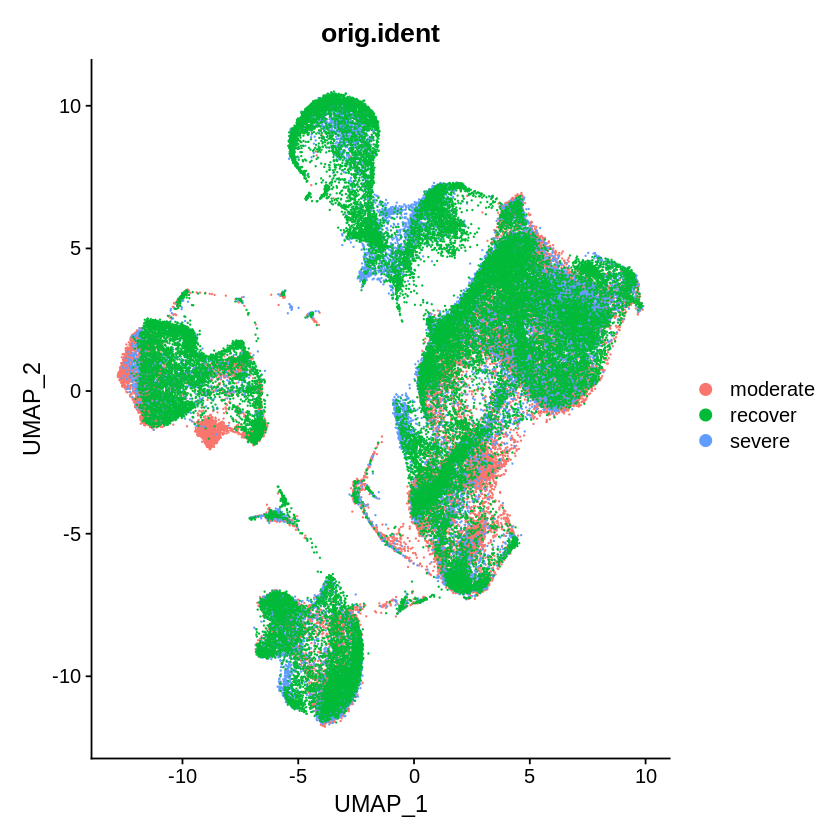

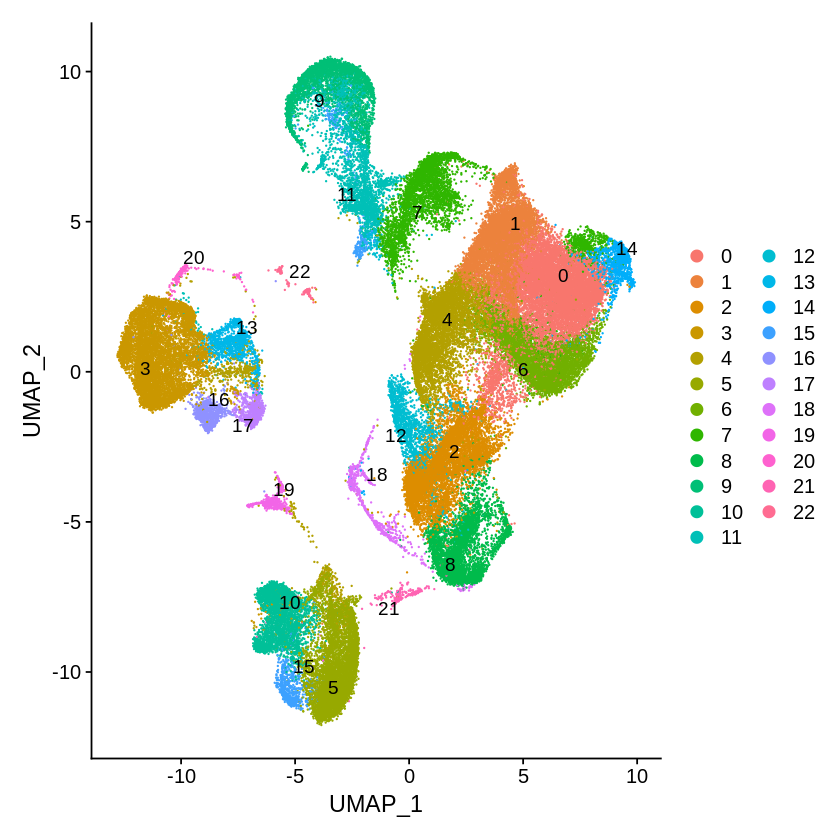

In [104]:
# Visualization
DimPlot(all.combined, reduction = "umap", group.by = "orig.ident")
DimPlot(all.combined, reduction = "umap", label = TRUE, repel = TRUE)

In [ ]:
#find cell type using marker
marker <- c("CD3G","TYROBP",'FCGR3A','MS4A1','JCHAIN','MKI67','CD14','CD1C','SERPINF1','PF4','HBA2','CCL5','TUBB')

for (i in marker) {
    print(FeaturePlot(all.combined, features = i, min.cutoff = "q9"))}

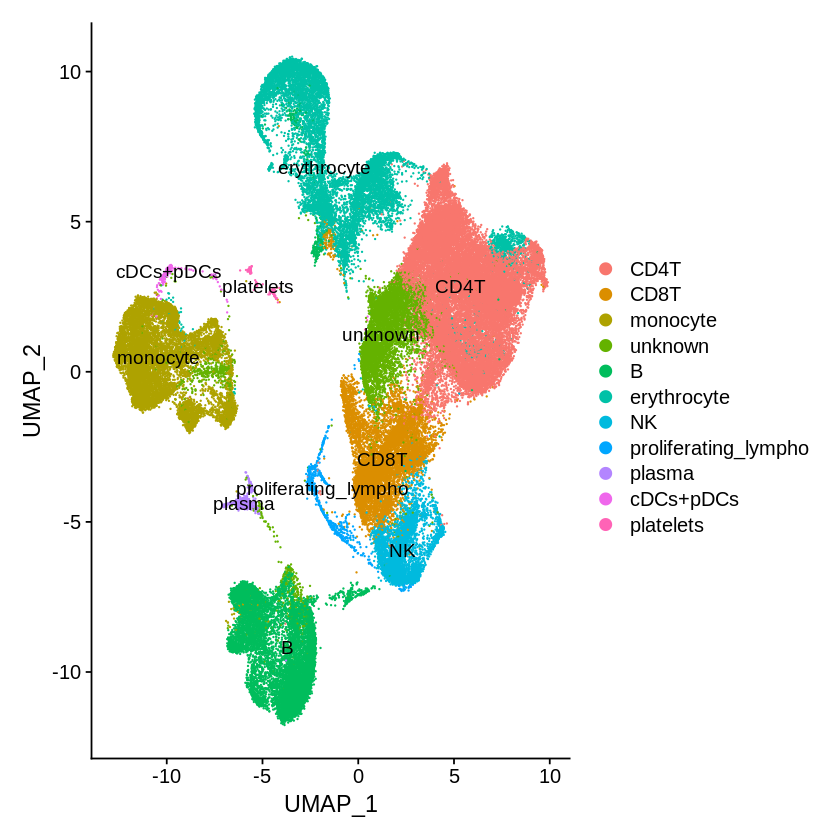

In [105]:
#annotate clusters as specific cell types
all.combined <- RenameIdents(object = all.combined, 
                             '0' = "CD4T", '1' = "CD4T", '2' = "CD8T", 
                             '3' = "monocyte", '4' = "unknown", '5' = "B", '6' = "CD4T", '7' = "erythrocyte", 
                             '8' = "NK", '9' = "erythrocyte", '10' = "B",'11'='erythrocyte', '12'='CD8T',
                             '13'='monocyte', '14'='CD4T','15'='B','16'='monocyte','17'='monocyte',
                             '18'='proliferating_lympho','19'='plasma','20'='cDCs+pDCs','21'='B','22'='platelets')
DimPlot(all.combined, label = TRUE)

In [33]:
all.combined$celltype.ori <- paste(Idents(all.combined), all.combined$orig.ident, sep = "_")
all.combined$celltype <- Idents(all.combined)
Idents(all.combined) <- "celltype.ori"

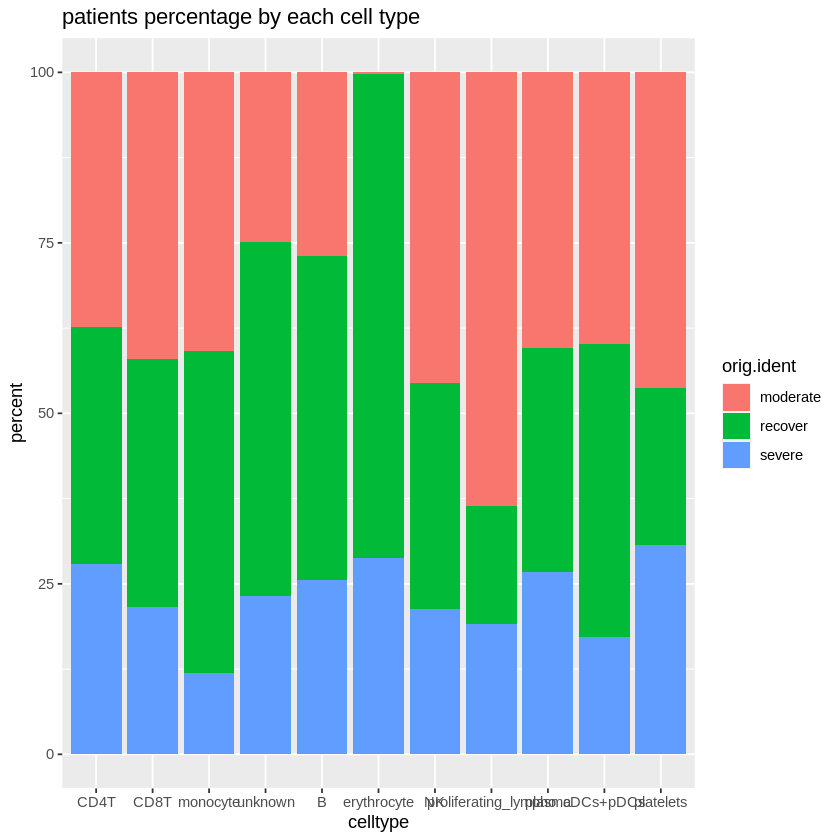

In [38]:
#patients percentage by each cell type
all.combined@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(celltype) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup() %>%
  ggplot(aes(x=celltype,y=percent, fill=orig.ident)) +
  geom_col() +
  ggtitle("patients percentage by each cell type")

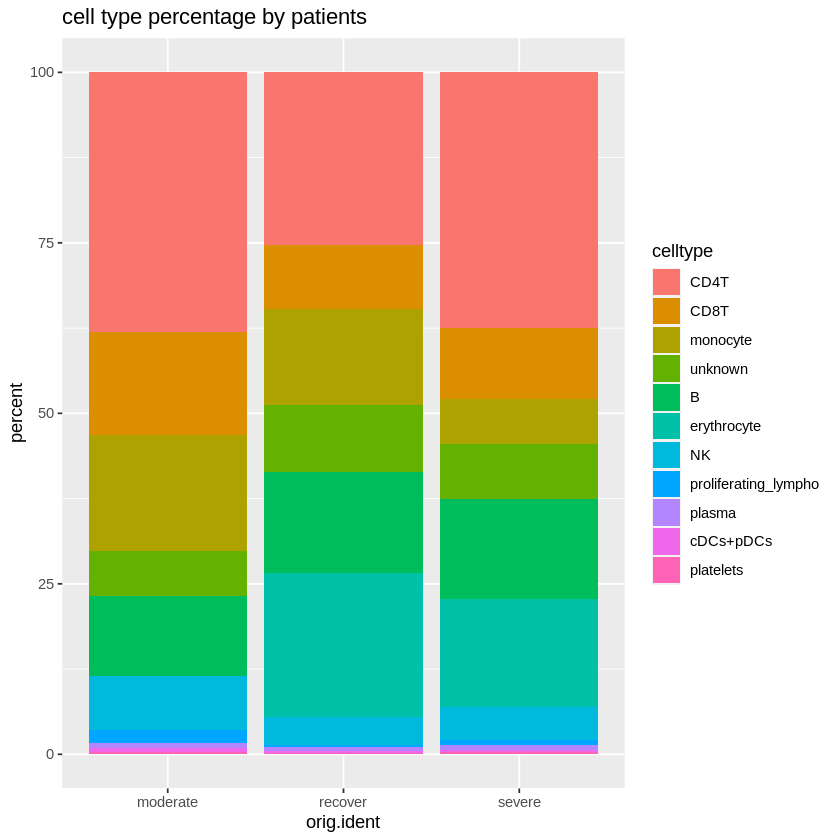

In [39]:
#cell type percentage by patients 
all.combined@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(orig.ident) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup() %>%
  ggplot(aes(x=orig.ident,y=percent, fill=celltype)) +
  geom_col() +
  ggtitle("cell type percentage by patients")

## Analysis by each cluster

In [43]:
#make object by each cluster
Idents(all.combined) <- 'celltype'
NK <- subset(x = all.combined, idents = "NK")
CD4T <- subset(x = all.combined, idents = "CD4T")
CD8T <- subset(x = all.combined, idents = "CD8T")
B <- subset(x = all.combined, idents = c("B",'plasma'))
monocyte <- subset(x = all.combined, idents = c("monocyte",'cDCs+pDCs'))

### NKcell

16:22:35 UMAP embedding parameters a = 0.9922 b = 1.112

16:22:35 Read 4271 rows and found 29 numeric columns

16:22:35 Using Annoy for neighbor search, n_neighbors = 30

16:22:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:22:36 Writing NN index file to temp file /tmp/Rtmpgl5trX/file42024e74469c

16:22:36 Searching Annoy index using 1 thread, search_k = 3000

16:22:37 Annoy recall = 100%

16:22:37 Commencing smooth kNN distance calibration using 1 thread

16:22:38 Initializing from normalized Laplacian + noise

16:22:38 Commencing optimization for 500 epochs, with 199698 positive edges

16:22:45 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4271
Number of edges: 177185

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7955
Number of communities: 6
Elapsed time: 0 seconds


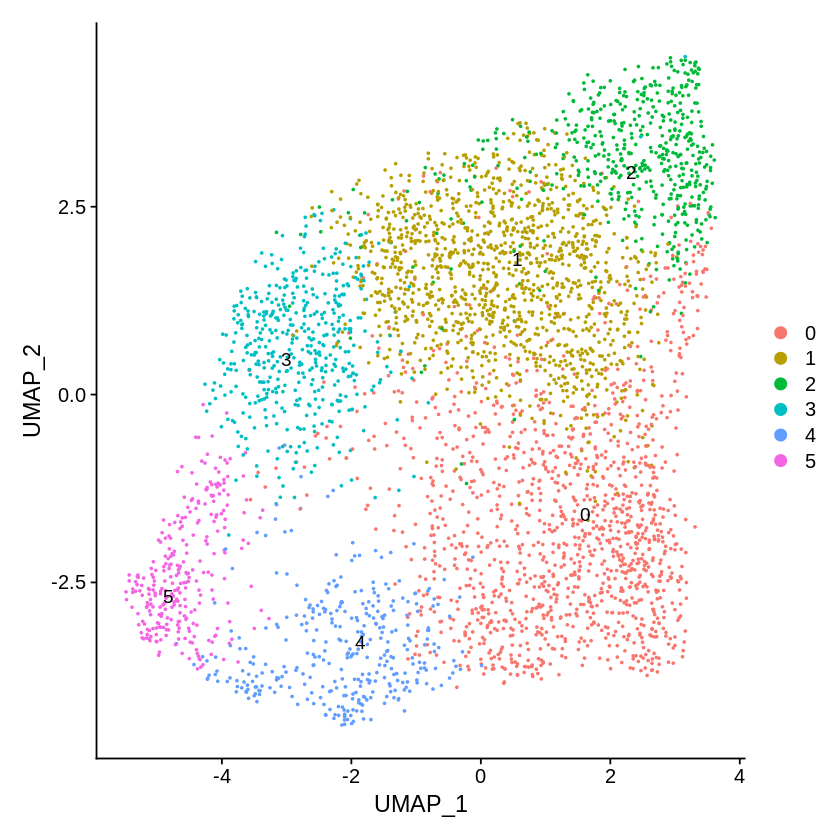

In [94]:
#find cluster
NK <- RunUMAP(NK, reduction = "pca", dims = 1:29)
NK <- FindNeighbors(NK, reduction = "pca", dims = 1:29)
NK <- FindClusters(NK, resolution = 0.5)
DimPlot(NK, reduction = "umap", label = TRUE, repel = TRUE)

In [ ]:
#find cell type using marker
NKmarker <- c("KLRC1","TYROBP",'FCGR3A','PRF1','KLRC2')

for (i in NKmarker) {
    print(FeaturePlot(NK, features = i, min.cutoff = "q9"))}

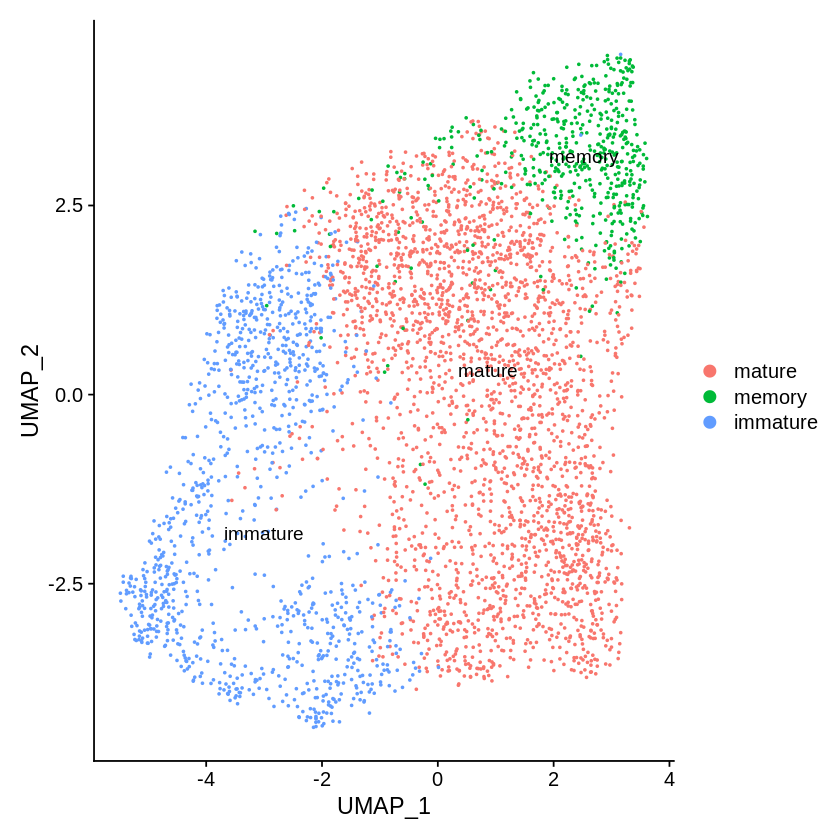

In [46]:
#annotate clusters as specific cell types
NK <- RenameIdents(object = NK, '0' = "mature", '1' = "mature", '2' = "memory", 
                   '3' = "immature", '4' = "immature", '5' = "immature")
DimPlot(NK, label = TRUE)

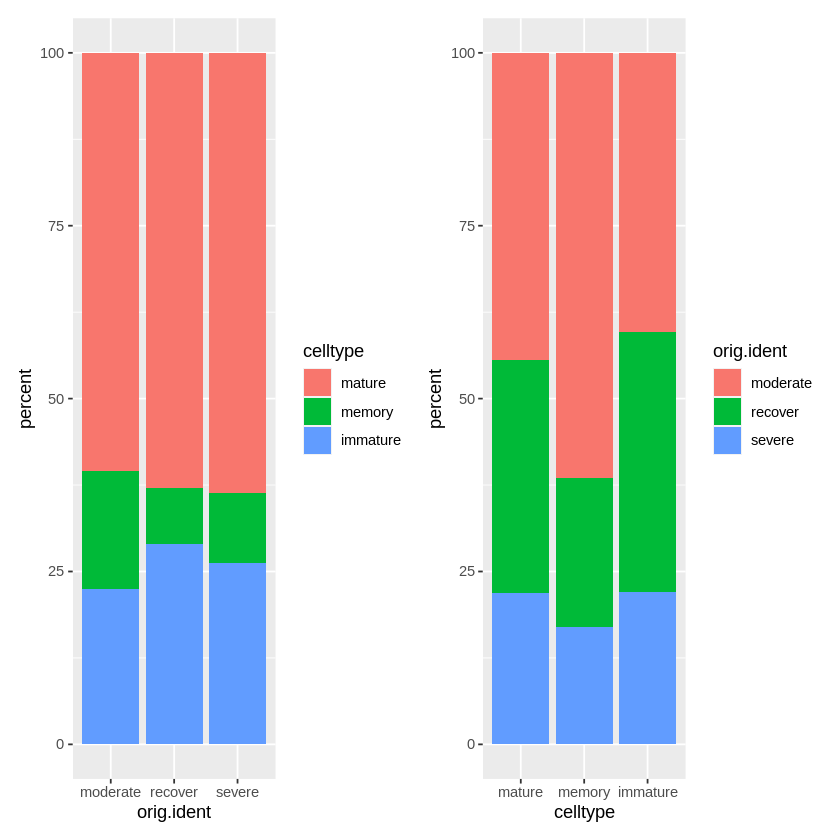

In [48]:
NK$celltype <- Idents(NK)
a<-NK@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(orig.ident) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup()
b<-NK@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(celltype) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup()
ggplot(a,aes(x=orig.ident,y=percent, fill=celltype)) + geom_col() + ggplot(b,aes(x=celltype,y=percent, fill=orig.ident))+ geom_col() 

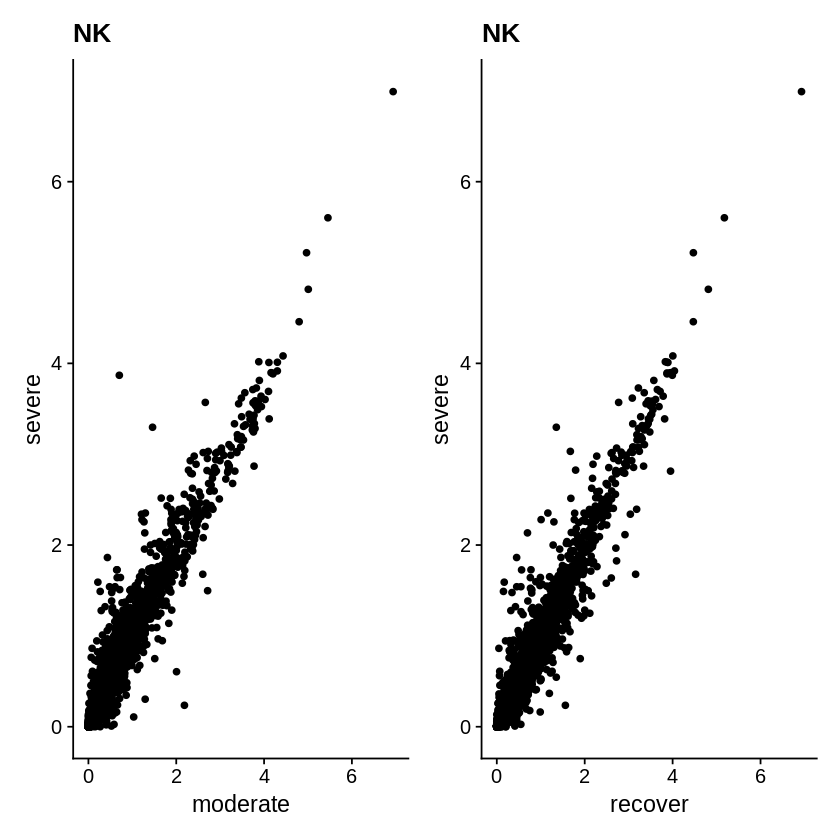

In [51]:
#plot to compare gene expression level between severe and other groups
Idents(NK) <- "orig.ident"
library(ggplot2)
library(cowplot)
theme_set(theme_cowplot())
avg.NK.cells <- as.data.frame(log1p(AverageExpression(NK, verbose = FALSE)$RNA))
avg.NK.cells$gene <- rownames(avg.NK.cells)
p1 <- ggplot(avg.NK.cells, aes(moderate, severe)) + geom_point() + ggtitle("NK")
p2 <- ggplot(avg.NK.cells, aes(recover, severe)) + geom_point() + ggtitle("NK")
p1+p2

In [538]:
#find DEG between severe and other groups were calculated using MAST
NK.ms.DEG <- FindMarkers(NK, ident.1 = "severe", ident.2 = "moderate", verbose = FALSE, test.use = 'MAST')
NK.sr.DEG <- FindMarkers(NK, ident.1 = "severe", ident.2 = "recover", verbose = FALSE, test.use = 'MAST')
head(NK.ms.DEG, n = 15)
head(NK.sr.DEG, n = 15)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



p_val         avg_log2FC pct.1 pct.2 p_val_adj    
RPS4Y1    0.000000e+00 -2.8139926 0.019 0.809  0.000000e+00
MT2A     4.708446e-321  2.6489243 0.899 0.474 9.656080e-317
HBB      2.732203e-232  4.5662486 0.821 0.238 5.603202e-228
IFI44L   1.570032e-219  1.9854123 0.589 0.066 3.219822e-215
MX1      5.186331e-218  2.0627573 0.667 0.140 1.063613e-213
TXNIP    2.316437e-187  1.3106435 0.975 0.880 4.750550e-183
BST2     2.931583e-174  1.4272949 0.847 0.473 6.012090e-170
ISG20    2.976320e-174  1.5288888 0.818 0.470 6.103837e-170
HIST1H1E 1.460979e-168  1.6325774 0.813 0.387 2.996176e-164
RPS3     2.209401e-165 -0.7412934 0.981 0.997 4.531040e-161
EIF2AK2  1.737161e-155  1.5506969 0.664 0.234 3.562570e-151
RPS27    1.697850e-152 -0.7372245 0.974 0.997 3.481950e-148
IFIT3    3.163763e-145  1.7615944 0.484 0.075 6.488245e-141
CCL5     6.321436e-145 -1.0498512 0.817 0.956 1.296400e-140
RPS3A    3.632583e-143 -0.6718966 0.982 0.998 7.449701e-139

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
MT-CO1  0.000000e+00 -1.6436587 0.903 0.998  0.000000e+00
MT2A   5.138553e-293  2.8025903 0.899 0.455 1.053814e-288
IFITM1 1.987316e-224  1.4882425 0.931 0.691 4.075588e-220
JUN    3.332471e-203 -2.1349288 0.353 0.872 6.834232e-199
IFI44L 5.817110e-203  2.0517252 0.589 0.047 1.192973e-198
ISG20  7.148073e-184  1.8347443 0.818 0.345 1.465927e-179
MX1    6.086958e-182  2.0358873 0.667 0.139 1.248313e-177
MT-CO2 2.763204e-166 -1.1364540 0.863 0.985 5.666779e-162
RPS4Y1 6.071238e-161 -1.9105388 0.019 0.482 1.245090e-156
IFIT3  2.490377e-155  1.9300075 0.484 0.036 5.107265e-151
BST2   2.719339e-144  1.3788321 0.847 0.494 5.576820e-140
TXNIP  3.495463e-134  1.1513130 0.975 0.916 7.168495e-130
B2M    1.617048e-130  0.6130054 1.000 1.000 3.316243e-126
LY6E   2.837077e-130  1.1959348 0.872 0.636 5.818278e-126
MT-CO3 5.028325e-124 -1.3143285 0.589 0.881 1.031209e-119

In [539]:
#save DEG table for pathway analysis
write.table(NK.ms.DEG,file = 'NK.ms.DEG.txt',sep = '\t',row.names = TRUE)
write.table(NK.sr.DEG,file = 'NK.sr.DEG.txt',sep = '\t',row.names = TRUE)

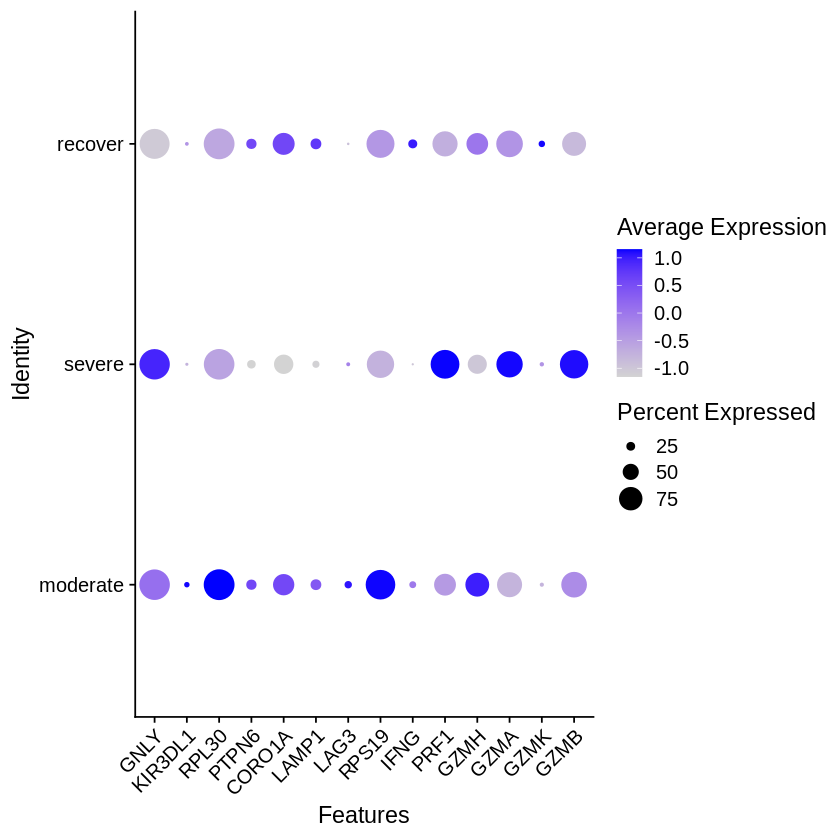

In [52]:
#compare cell killing gene expression by group
DefaultAssay(NK) <- "RNA"
NK.ck.markers <- c("GNLY",'KIR3DL1','RPL30','PTPN6','CORO1A','LAMP1','LAG3','RPS19','IFNG','PRF1','GZMH','GZMA','GZMK','GZMB')
DotPlot(NK, features = NK.ck.markers, dot.scale = 8) + 
    RotatedAxis()

### CD4T

15:45:02 UMAP embedding parameters a = 0.9922 b = 1.112

15:45:02 Read 25009 rows and found 29 numeric columns

15:45:02 Using Annoy for neighbor search, n_neighbors = 30

15:45:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:45:05 Writing NN index file to temp file /tmp/Rtmpgl5trX/file420275f869e4

15:45:05 Searching Annoy index using 1 thread, search_k = 3000

15:45:14 Annoy recall = 100%

15:45:14 Commencing smooth kNN distance calibration using 1 thread

15:45:16 Initializing from normalized Laplacian + noise

15:45:17 Commencing optimization for 200 epochs, with 1150398 positive edges

15:45:33 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25009
Number of edges: 862789

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8247
Number of communities: 9
Elapsed time: 5 seconds


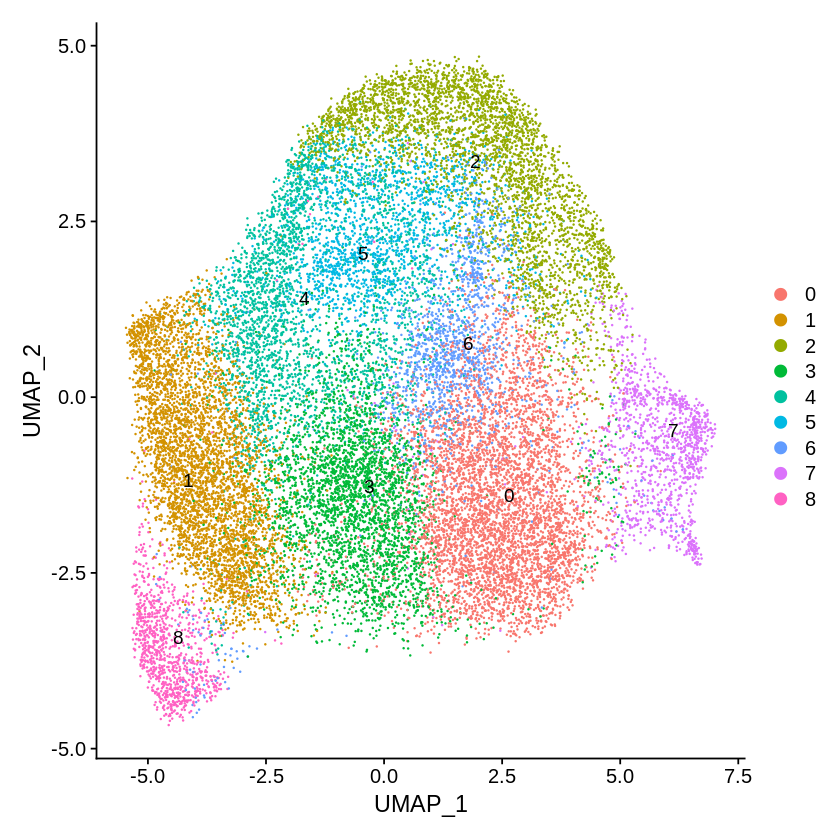

In [64]:
CD4T <- RunUMAP(CD4T, reduction = "pca", dims = 1:29)
CD4T <- FindNeighbors(CD4T, reduction = "pca", dims = 1:29)
CD4T <- FindClusters(CD4T, resolution = 0.5)
DimPlot(CD4T, reduction = "umap", label = TRUE, repel = TRUE)

In [ ]:
CD4Tmarker <- c("CCR7","LEF1",'CD69','ANXA1','PRDM1','FOXP3','RTKN2','S100A11')

for (i in CD4Tmarker) {
    print(FeaturePlot(CD4T, features = i, min.cutoff = "q9"))}

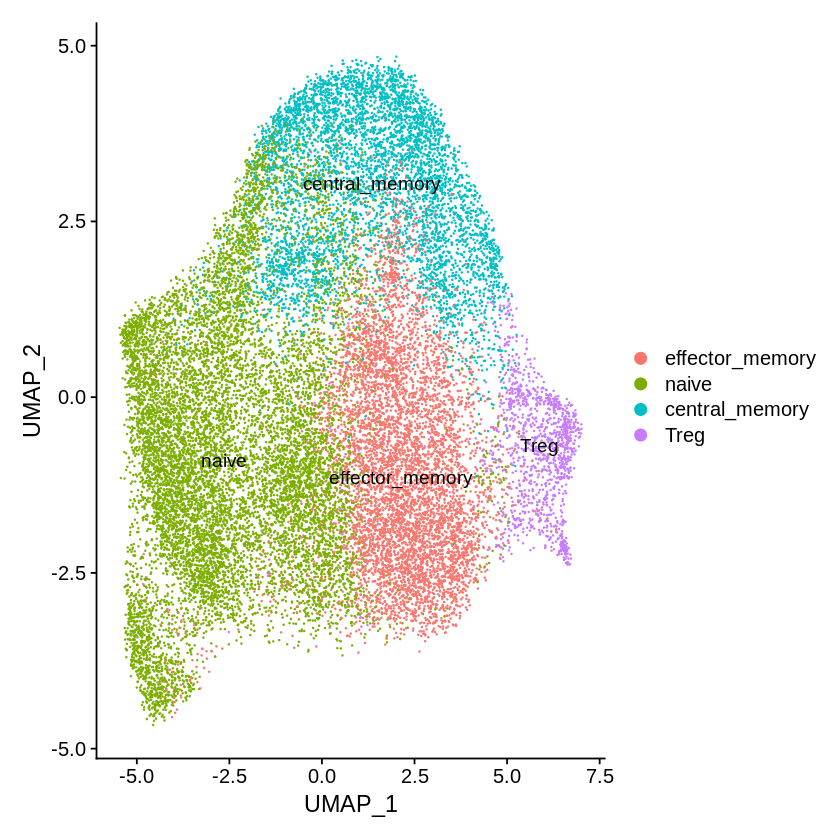

In [65]:
CD4T <- RenameIdents(object = CD4T, '0' = "effector_memory", '1' = "naive", '2' = "central_memory", 
                     '3' = "naive", '4' = "naive", '5' = "central_memory",'6'='effector_memory','7'='Treg','8'='naive')
DimPlot(CD4T, label = TRUE)

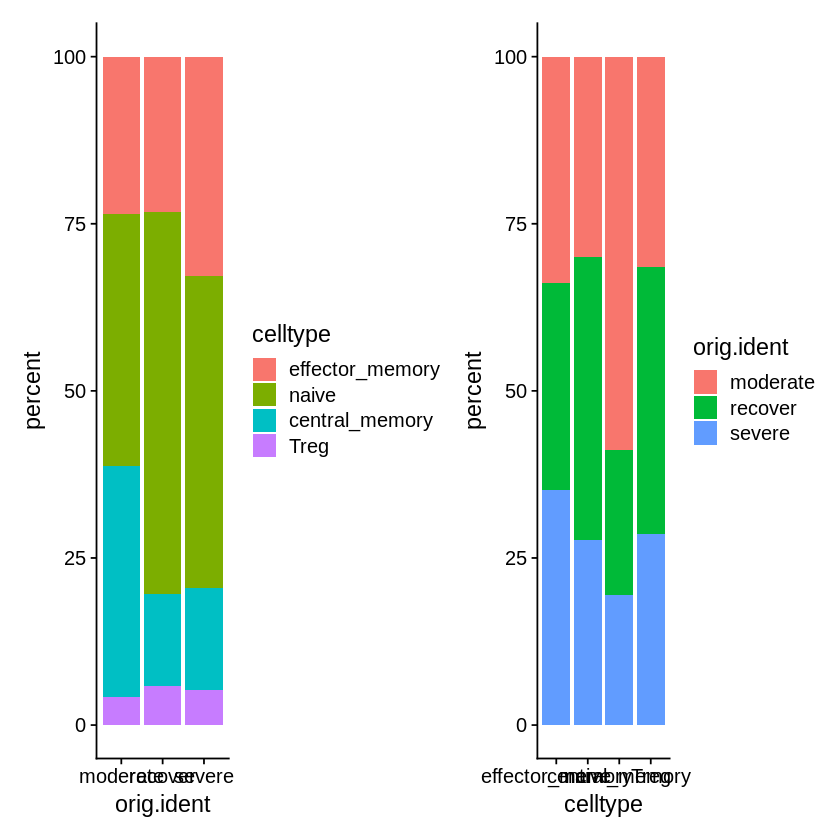

In [66]:
CD4T$celltype <- Idents(CD4T)
a<-CD4T@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(orig.ident) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup()
b<-CD4T@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(celltype) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup()
ggplot(a,aes(x=orig.ident,y=percent, fill=celltype)) + geom_col() + ggplot(b,aes(x=celltype,y=percent, fill=orig.ident))+ geom_col() 

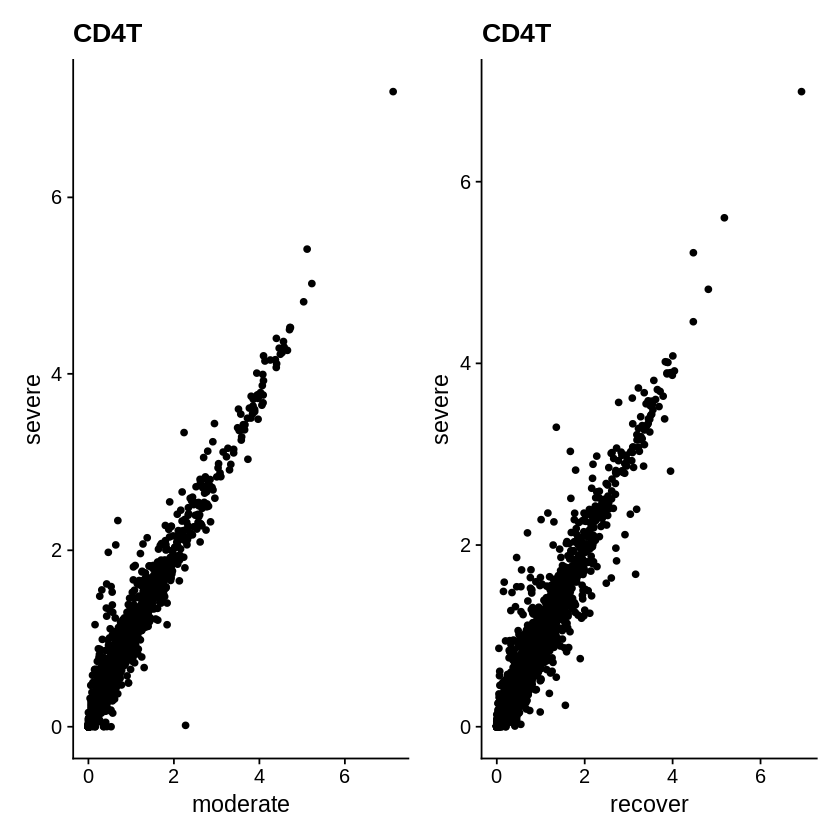

In [67]:
Idents(CD4T) <- "orig.ident"
library(ggplot2)
library(cowplot)
theme_set(theme_cowplot())
avg.CD4T.cells <- as.data.frame(log1p(AverageExpression(CD4T, verbose = FALSE)$RNA))
avg.CD4T.cells$gene <- rownames(avg.CD4T.cells)
p1 <- ggplot(avg.CD4T.cells, aes(moderate, severe)) + geom_point() + ggtitle("CD4T")
p2 <- ggplot(avg.NK.cells, aes(recover, severe)) + geom_point() + ggtitle("CD4T")
p1+p2

In [540]:
CD4T.ms.DEG <- FindMarkers(CD4T, ident.1 = "severe", ident.2 = "moderate", verbose = FALSE, test.use = 'MAST')
CD4T.sr.DEG <- FindMarkers(CD4T, ident.1 = "severe", ident.2 = "recover", verbose = FALSE, test.use = 'MAST')
head(CD4T.ms.DEG, n = 15)
head(CD4T.sr.DEG, n = 15)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



p_val avg_log2FC pct.1 pct.2 p_val_adj
B2M       0      0.4280400 1.000 1.000 0        
DDX3Y     0     -0.7644444 0.000 0.167 0        
EIF2AK2   0      1.5252735 0.503 0.164 0        
HBA1      0      1.7847847 0.487 0.088 0        
HBA2      0      2.1805465 0.689 0.136 0        
HBB       0      2.3782071 0.793 0.208 0        
HIST1H1E  0      2.0502690 0.667 0.189 0        
IFI44L    0      1.7518785 0.446 0.074 0        
IFIT3     0      1.4453798 0.286 0.032 0        
IFITM1    0      0.9331064 0.839 0.692 0        
IRF7      0      1.1912167 0.399 0.118 0        
ISG15     0      1.3357986 0.403 0.118 0        
LCP1      0      1.0578588 0.651 0.373 0        
LY6E      0      1.1063595 0.709 0.490 0        
MTRNR2L12 0      1.0768501 0.659 0.420 0

p_val avg_log2FC pct.1 pct.2 p_val_adj
B2M      0      0.9926258 1.000 1.000 0        
DDX3Y    0     -0.9080954 0.000 0.179 0        
EIF2AK2  0      1.4286293 0.503 0.171 0        
HBA1     0      0.5168637 0.487 0.160 0        
HBA2     0      0.5100473 0.689 0.248 0        
HIST1H1E 0     -1.1546938 0.667 0.917 0        
HLA-B    0      0.9476452 0.965 0.851 0        
HLA-C    0      1.0986421 0.969 0.855 0        
IER2     0     -1.1355145 0.626 0.837 0        
IFI44L   0      1.9294248 0.446 0.031 0        
IFI6     0      1.0893791 0.283 0.062 0        
IFIT3    0      1.5658577 0.286 0.015 0        
IFITM1   0      1.7572180 0.839 0.458 0        
IRF7     0      1.3223946 0.399 0.090 0        
ISG15    0      1.4247183 0.403 0.098 0

In [541]:
write.table(CD4T.ms.DEG,file = 'CD4T.ms.DEG.txt',sep = '\t',row.names = TRUE)
write.table(CD4T.sr.DEG,file = 'CD4T.sr.DEG.txt',sep = '\t',row.names = TRUE)

### CD8T

15:45:58 UMAP embedding parameters a = 0.9922 b = 1.112

15:45:59 Read 8858 rows and found 29 numeric columns

15:45:59 Using Annoy for neighbor search, n_neighbors = 30

15:45:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:46:00 Writing NN index file to temp file /tmp/Rtmpgl5trX/file4202734af1bf

15:46:00 Searching Annoy index using 1 thread, search_k = 3000

15:46:02 Annoy recall = 100%

15:46:03 Commencing smooth kNN distance calibration using 1 thread

15:46:04 Initializing from normalized Laplacian + noise

15:46:04 Commencing optimization for 500 epochs, with 409740 positive edges

15:46:17 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8858
Number of edges: 346332

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8205
Number of communities: 6
Elapsed time: 1 seconds


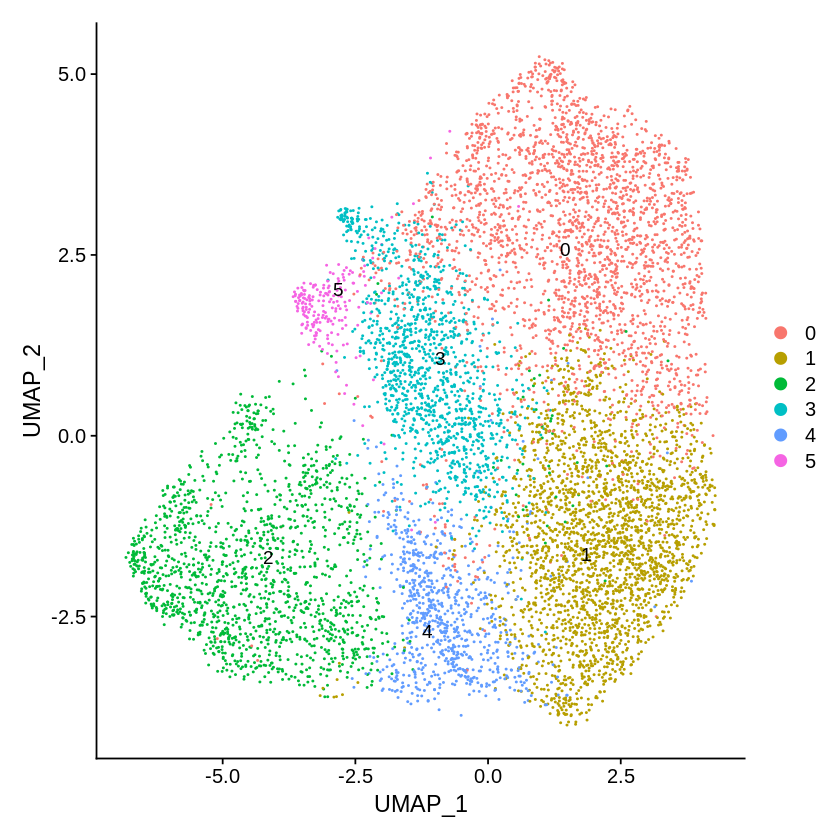

In [68]:
CD8T <- RunUMAP(CD8T, reduction = "pca", dims = 1:29)
CD8T <- FindNeighbors(CD8T, reduction = "pca", dims = 1:29)
CD8T <- FindClusters(CD8T, resolution = 0.5)
DimPlot(CD8T, reduction = "umap", label = TRUE, repel = TRUE)

In [ ]:
CD8Tmarker <- c('LINC02446',"CCR7","TCF7",'LEF1','GZMB','PRF1','GZMK','GNLY')

for (i in CD8Tmarker) {
    print(FeaturePlot(CD8T, features = i, min.cutoff = "q9"))}

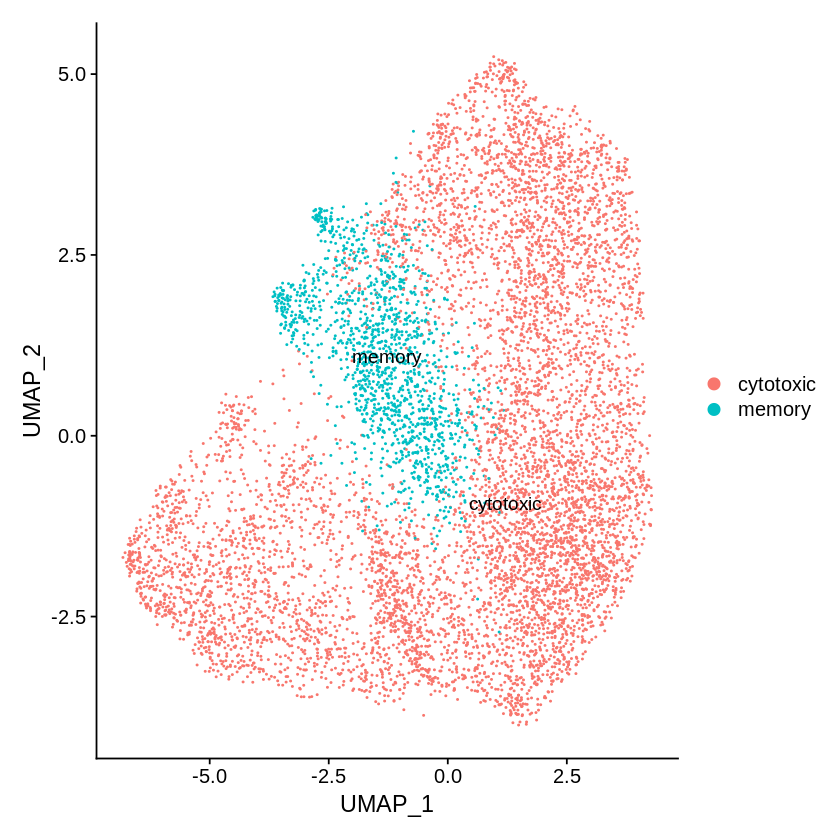

In [70]:
CD8T <- RenameIdents(object = CD8T, '0' = "cytotoxic", '1' = "cytotoxic", '2' = "cytotoxic", 
                     '3' = "memory", '4' = "cytotoxic", '5' = "memory")
DimPlot(CD8T, label = TRUE)

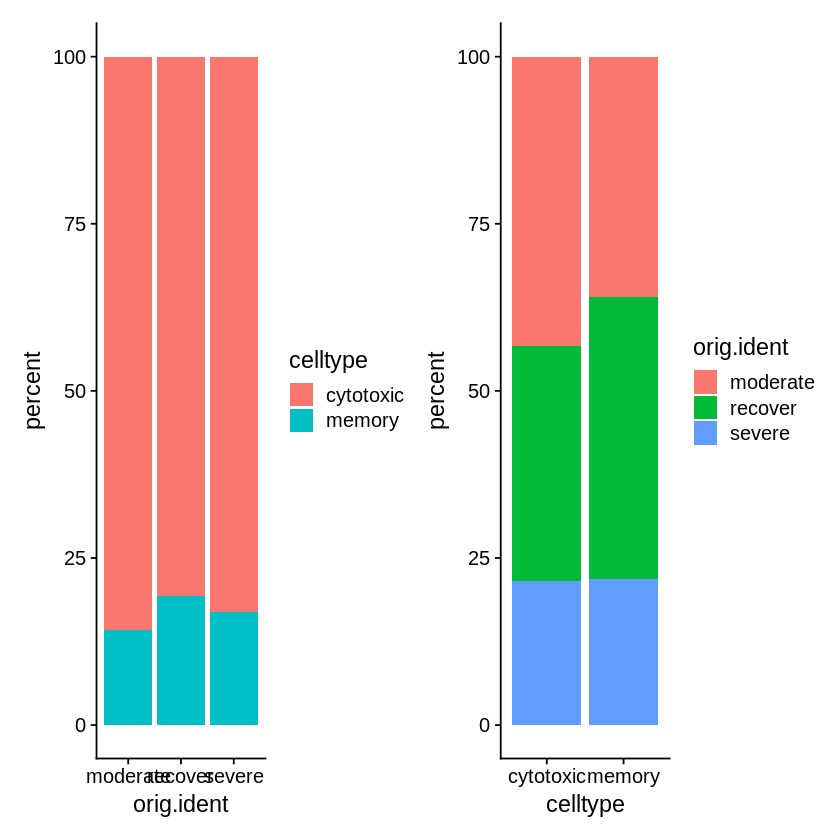

In [71]:
CD8T$celltype <- Idents(CD8T)
a<-CD8T@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(orig.ident) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup()
b<-CD8T@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(celltype) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup()
ggplot(a,aes(x=orig.ident,y=percent, fill=celltype)) + geom_col() + ggplot(b,aes(x=celltype,y=percent, fill=orig.ident))+ geom_col() 

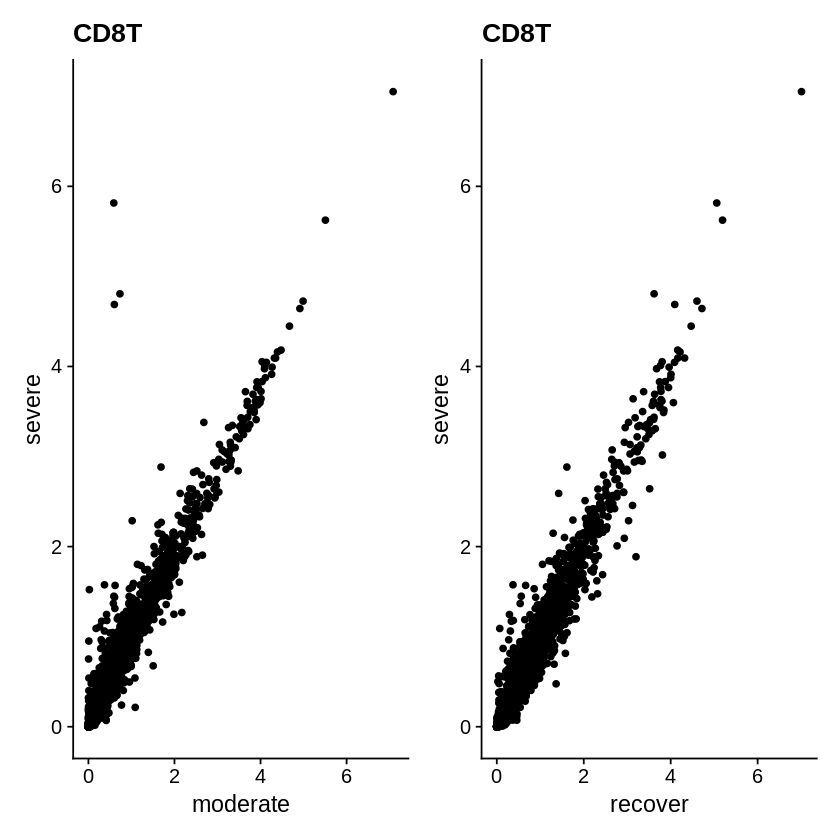

In [74]:
Idents(CD8T) <- 'orig.ident'
avg.CD8T.cells <- as.data.frame(log1p(AverageExpression(CD8T, verbose = FALSE)$RNA))
avg.CD8T.cells$gene <- rownames(avg.CD8T.cells)
p1 <- ggplot(avg.CD8T.cells, aes(moderate, severe)) + geom_point() + ggtitle("CD8T")
p2 <- ggplot(avg.CD8T.cells, aes( recover,severe)) + geom_point() + ggtitle("CD8T")
p1+p2

In [542]:
CD8T.ms.DEG <- FindMarkers(CD8T, ident.1 = "severe", ident.2 = "moderate", verbose = FALSE, test.use = 'MAST')
CD8T.sr.DEG <- FindMarkers(CD8T, ident.1 = "severe", ident.2 = "recover", verbose = FALSE, test.use = 'MAST')
head(CD8T.ms.DEG, n = 15)
head(CD8T.sr.DEG, n = 15)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



p_val         avg_log2FC pct.1 pct.2 p_val_adj    
HBA1      0.000000e+00  5.8772050 0.674 0.138  0.000000e+00
HBA2      0.000000e+00  5.8937831 0.781 0.157  0.000000e+00
HBB       0.000000e+00  7.5392397 0.852 0.184  0.000000e+00
MT2A      0.000000e+00  1.7252531 0.772 0.532  0.000000e+00
RPS29    8.720615e-304 -0.9222623 0.883 0.983 1.788424e-299
HIST1H1E 1.115645e-291  1.8324931 0.671 0.305 2.287965e-287
MX1      1.947293e-251  1.7352095 0.463 0.114 3.993508e-247
RPS27    5.278957e-217 -0.7039215 0.950 0.994 1.082608e-212
HBD      1.179007e-211  2.1639420 0.239 0.006 2.417908e-207
TXNIP    1.775738e-202  1.0055133 0.919 0.868 3.641683e-198
RPL37    1.092579e-189 -0.5753970 0.955 0.995 2.240661e-185
EIF2AK2  2.122540e-186  1.3697225 0.489 0.195 4.352906e-182
RPS4Y1   1.089157e-175 -1.0648196 0.193 0.570 2.233643e-171
RPS21    2.513731e-174 -0.5859535 0.908 0.985 5.155160e-170
IFI44L   3.418346e-167  1.3164376 0.310 0.048 7.010343e-163

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
IFITM1    0.000000e+00  1.6838659 0.775 0.507  0.000000e+00
JUN       0.000000e+00 -1.8967671 0.464 0.876  0.000000e+00
MT-CO1    0.000000e+00 -1.1432700 0.909 0.994  0.000000e+00
MT2A      0.000000e+00  1.8334248 0.772 0.527  0.000000e+00
B2M      1.492078e-321  0.6220006 1.000 1.000 3.059954e-317
MT-CYB   1.323780e-292 -1.2133327 0.682 0.947 2.714808e-288
MT-CO2   3.459512e-272 -0.9593222 0.804 0.976 7.094767e-268
EEF1A1   6.607523e-266 -0.6694060 0.964 0.997 1.355071e-261
LY6E     4.774747e-237  1.2290138 0.673 0.473 9.792051e-233
MX1      1.003671e-228  1.7360806 0.463 0.103 2.058329e-224
HIST1H1E 9.924064e-220 -1.0736286 0.671 0.936 2.035227e-215
IFI44L   7.245179e-212  1.4754988 0.310 0.019 1.485841e-207
MT-ATP6  3.860671e-188 -1.0777790 0.451 0.809 7.917465e-184
MT-CO3   4.086964e-188 -1.0759032 0.531 0.852 8.381546e-184
IER2     1.286586e-185 -1.0945408 0.585 0.881 2.638531e-181

In [543]:
write.table(CD8T.ms.DEG,file = 'CD8T.ms.DEG.txt',sep = '\t',row.names = TRUE)
write.table(CD8T.sr.DEG,file = 'CD8T.sr.DEG.txt',sep = '\t',row.names = TRUE)

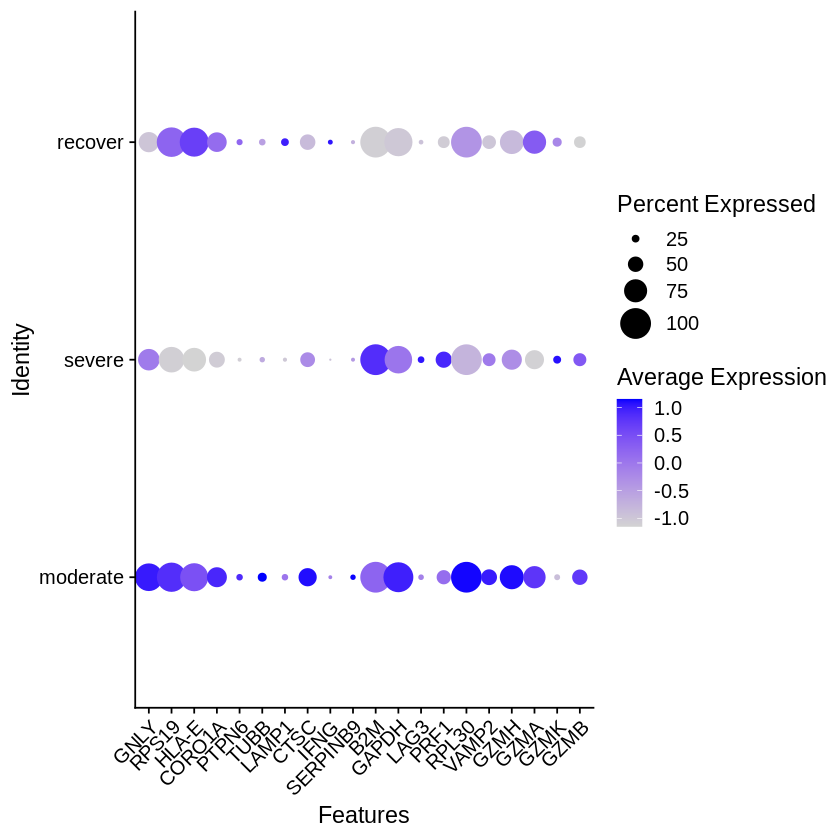

In [334]:
#compare cell killing gene expression by group
DefaultAssay(CD8T) <- "RNA"
CD8T.ck.markers <- c("GNLY",'RPS19','HLA-E','CORO1A','PTPN6','TUBB','LAMP1','CTSC','IFNG','SERPINB9','B2M','GAPDH','LAG3','PRF1','RPL30','VAMP2','GZMH','GZMA','GZMK','GZMB')
DotPlot(CD8T, features = CD8T.ck.markers, dot.scale = 8) + 
    RotatedAxis()

### B,plasma

16:20:15 UMAP embedding parameters a = 0.9922 b = 1.112

16:20:15 Read 11183 rows and found 29 numeric columns

16:20:15 Using Annoy for neighbor search, n_neighbors = 30

16:20:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:20:17 Writing NN index file to temp file /tmp/Rtmpgl5trX/file420259d518e

16:20:17 Searching Annoy index using 1 thread, search_k = 3000

16:20:20 Annoy recall = 100%

16:20:21 Commencing smooth kNN distance calibration using 1 thread

16:20:22 Initializing from normalized Laplacian + noise

16:20:22 Commencing optimization for 200 epochs, with 516316 positive edges

16:20:29 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11183
Number of edges: 437439

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8665
Number of communities: 11
Elapsed time: 1 seconds


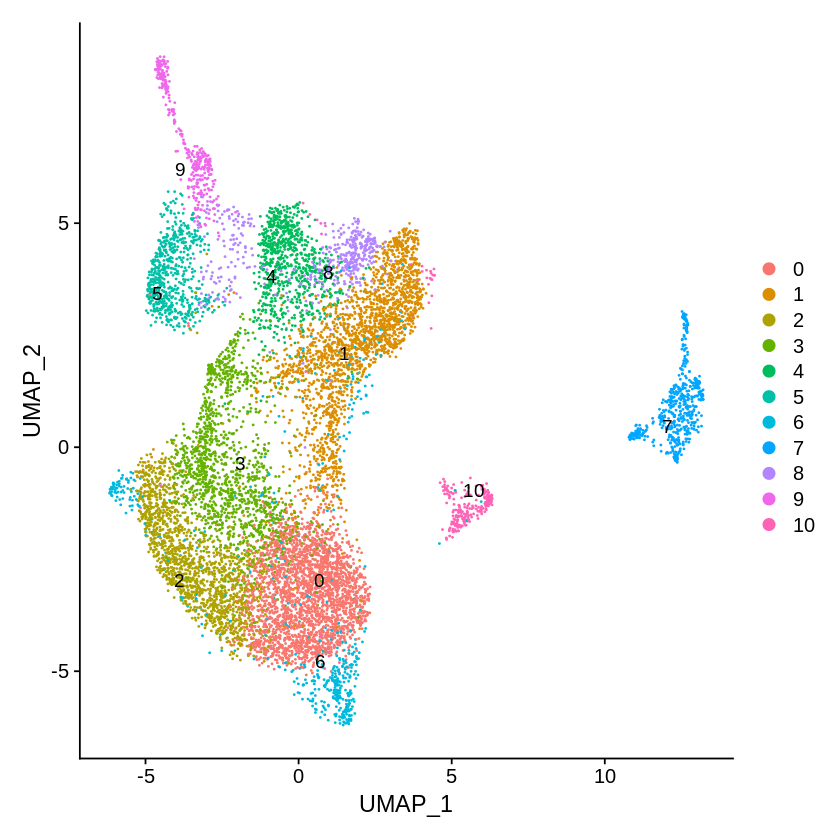

In [90]:
B <- RunUMAP(B, reduction = "pca", dims = 1:29)
B <- FindNeighbors(B, reduction = "pca", dims = 1:29)
B <- FindClusters(B, resolution = 0.5)
DimPlot(B, reduction = "umap", label = TRUE, repel = TRUE)

In [ ]:
B_marker <- c('IL7R','IGHM','IGHD','IL4R',' TCL1A','AIM2','JCHAIN)')

for (i in B_marker) {
    print(FeaturePlot(B_marker, features = i, min.cutoff = "q9"))}

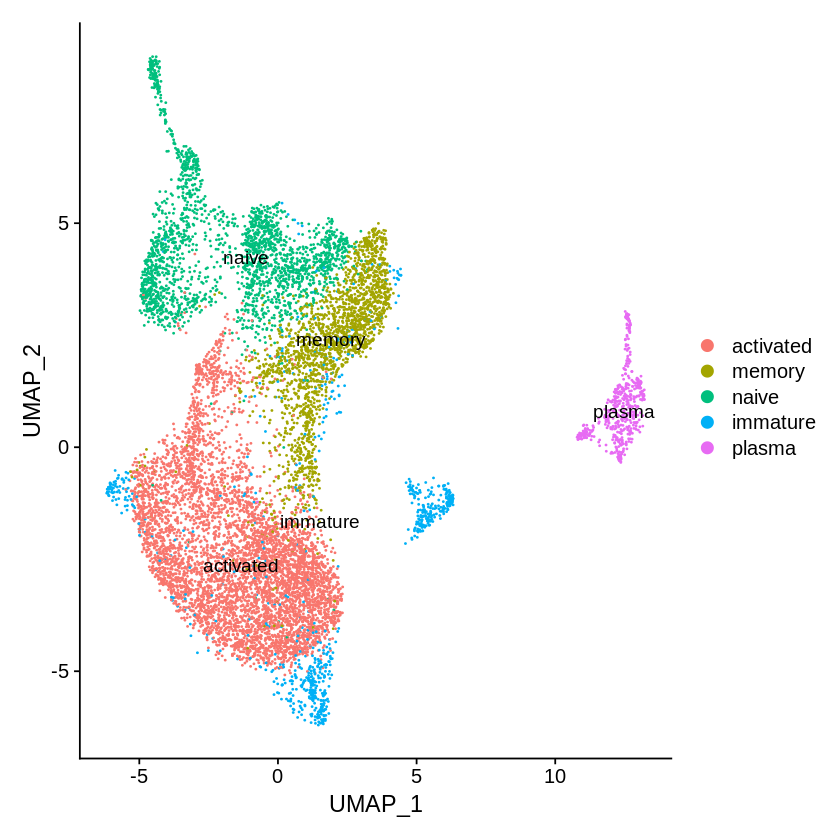

In [91]:
B <- RenameIdents(object = B, '0' = "activated", '1' = "memory", '2' = "activated", 
                  '3' = "activated", '4' = "naive", '5' = "naive",'6'='immature',
                  '7'='plasma','8'='naive','9'='naive','10'='immature')
DimPlot(B, label = TRUE)

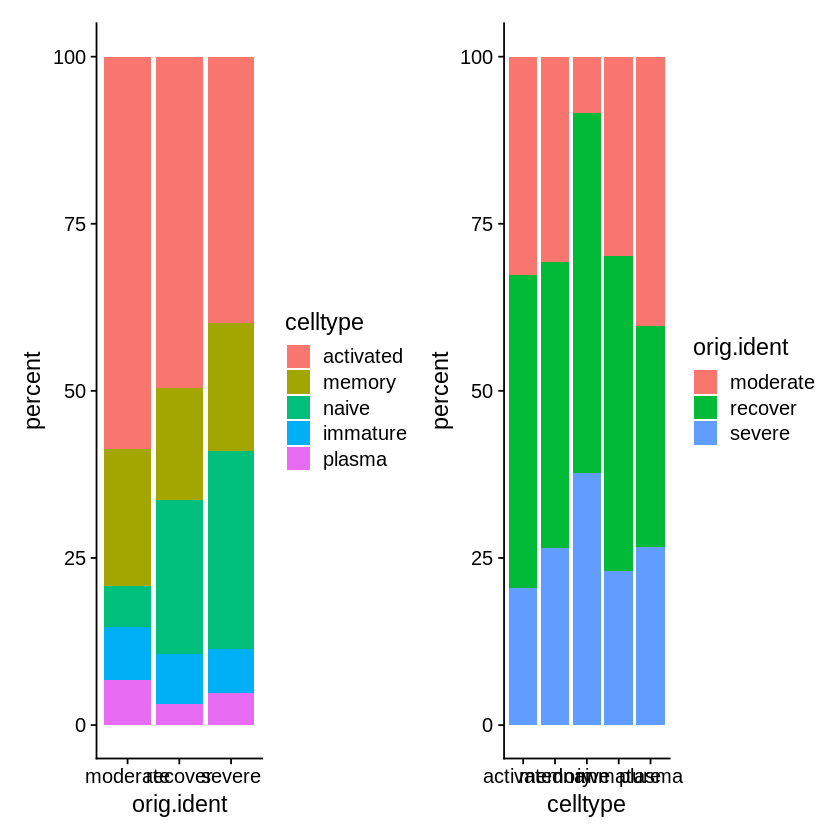

In [92]:
B$celltype <- Idents(B)
a<-B@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(orig.ident) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup()
b<-B@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(celltype) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup()
ggplot(a,aes(x=orig.ident,y=percent, fill=celltype)) + geom_col() + ggplot(b,aes(x=celltype,y=percent, fill=orig.ident))+ geom_col() 

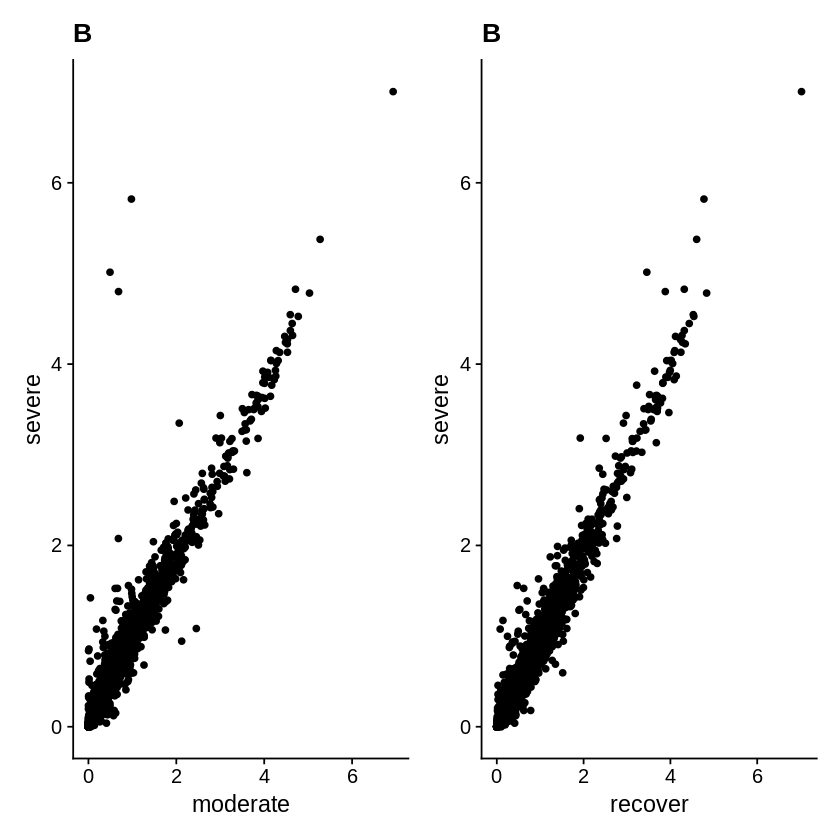

In [78]:
Idents(B) <- "orig.ident"
avg.B.cells <- as.data.frame(log1p(AverageExpression(B, verbose = FALSE)$RNA))
avg.B.cells$gene <- rownames(avg.B.cells)
p1 <- ggplot(avg.B.cells, aes(moderate, severe)) + geom_point() + ggtitle("B")
p2 <- ggplot(avg.B.cells, aes(recover, severe)) + geom_point() + ggtitle("B")
p1+p2

In [544]:
B.ms.DEG <- FindMarkers(B, ident.1 = "severe", ident.2 = "moderate", verbose = FALSE, test.use = 'MAST')
B.sr.DEG <- FindMarkers(B, ident.1 = "severe", ident.2 = "recover", verbose = FALSE, test.use = 'MAST')
head(B.ms.DEG, n = 15)
head(B.sr.DEG, n = 15)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



p_val         avg_log2FC pct.1 pct.2 p_val_adj    
HBA1      0.000000e+00  6.5239213 0.620 0.113  0.000000e+00
HBA2      0.000000e+00  5.9366893 0.760 0.163  0.000000e+00
HBB       0.000000e+00  6.9858925 0.850 0.254  0.000000e+00
HIST1H1E  0.000000e+00  2.0111673 0.650 0.214  0.000000e+00
RPS26     0.000000e+00  1.8504984 0.828 0.775  0.000000e+00
RPS29     0.000000e+00 -1.1581153 0.882 0.980  0.000000e+00
RPS4Y1    0.000000e+00 -1.6998414 0.135 0.672  0.000000e+00
RPL37    2.458776e-269 -0.7343550 0.954 0.991 5.042457e-265
RPL37A   7.761072e-243 -0.8862735 0.806 0.942 1.591641e-238
RPS27    2.067838e-230 -0.7178139 0.955 0.987 4.240722e-226
RPS3A    6.252091e-216 -0.6630650 0.949 0.986 1.282179e-211
RPS21    2.028295e-205 -0.6367317 0.928 0.982 4.159627e-201
RPL8     3.215701e-205 -0.5780832 0.968 0.992 6.594759e-201
RPL34    4.474767e-191 -0.5761772 0.973 0.994 9.176852e-187
RPS25    1.933218e-186 -0.6858855 0.881 0.966 3.964644e-182

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
MT-CO1   2.571071e-282 -0.7204650 0.950 0.995 5.272752e-278
IFITM1   2.998368e-273  1.5683071 0.426 0.138 6.149053e-269
B2M      1.333085e-266  0.7305954 0.991 0.994 2.733890e-262
IFI44L   1.416179e-258  1.4868743 0.290 0.030 2.904299e-254
IFIT3    9.476743e-236  1.4414537 0.244 0.020 1.943490e-231
HIST1H1E 3.369271e-225 -0.9891283 0.650 0.881 6.909700e-221
HLA-C    3.175395e-209  0.7091129 0.833 0.812 6.512099e-205
MT-CO3   2.007703e-207 -0.8156620 0.705 0.911 4.117398e-203
MX1      1.317577e-189  1.3071467 0.418 0.180 2.702086e-185
MT-CYB   5.501443e-178 -0.6732568 0.804 0.944 1.128236e-173
HBA2     1.905537e-169  1.3245931 0.760 0.445 3.907875e-165
LYZ      6.616927e-169 -1.3329649 0.145 0.429 1.356999e-164
JUN      8.147124e-168 -0.7828611 0.752 0.917 1.670812e-163
ISG20    6.168359e-161  0.9257686 0.607 0.421 1.265007e-156
ISG15    1.182233e-153  1.0835087 0.278 0.074 2.424523e-149

In [545]:
write.table(B.ms.DEG,file = 'B.ms.DEG.txt',sep = '\t',row.names = TRUE)
write.table(B.sr.DEG,file = 'B.sr.DEG.txt',sep = '\t',row.names = TRUE)

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: FRSF13C”


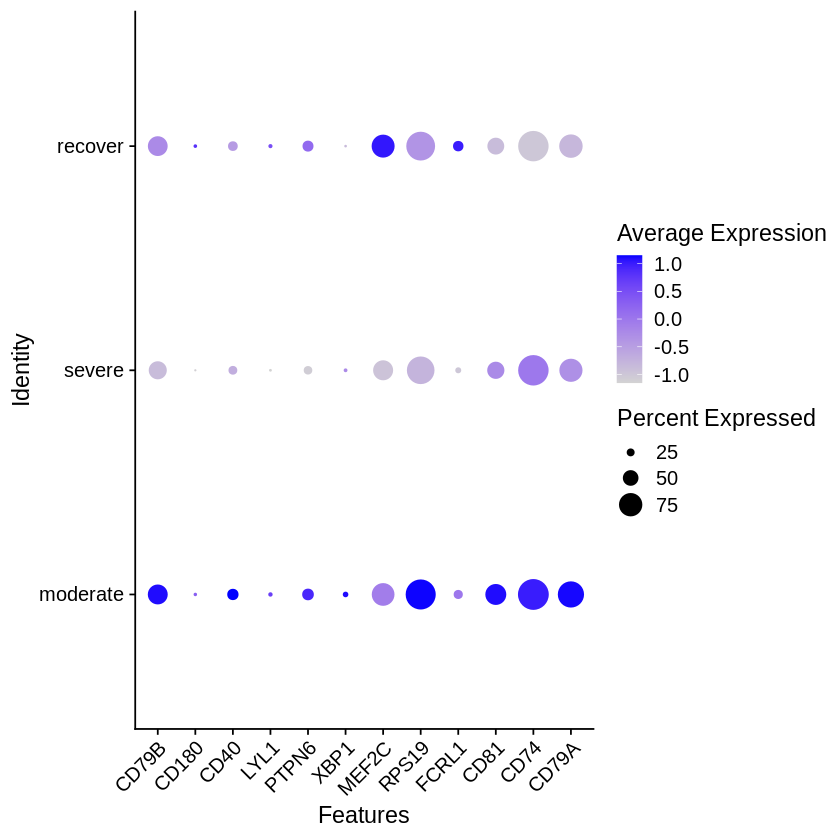

In [79]:
#compare Bcell activation gene expression by group
DefaultAssay(B) <- "RNA"
B.ck.markers <- c("CD79B",'CD180','CD40','LYL1','PTPN6','XBP1','MEF2C','RPS19','FCRL1','FRSF13C','CD81','CD74','CD79A')
DotPlot(B, features = B.ck.markers, dot.scale = 8) + 
    RotatedAxis()

### monocyte+DC

16:00:05 UMAP embedding parameters a = 0.9922 b = 1.112

16:00:05 Read 10603 rows and found 29 numeric columns

16:00:05 Using Annoy for neighbor search, n_neighbors = 30

16:00:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:00:07 Writing NN index file to temp file /tmp/Rtmpgl5trX/file420254dbb689

16:00:07 Searching Annoy index using 1 thread, search_k = 3000

16:00:10 Annoy recall = 100%

16:00:10 Commencing smooth kNN distance calibration using 1 thread

16:00:11 Initializing from normalized Laplacian + noise

16:00:12 Commencing optimization for 200 epochs, with 475478 positive edges

16:00:18 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10603
Number of edges: 384195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8709
Number of communities: 9
Elapsed time: 1 seconds


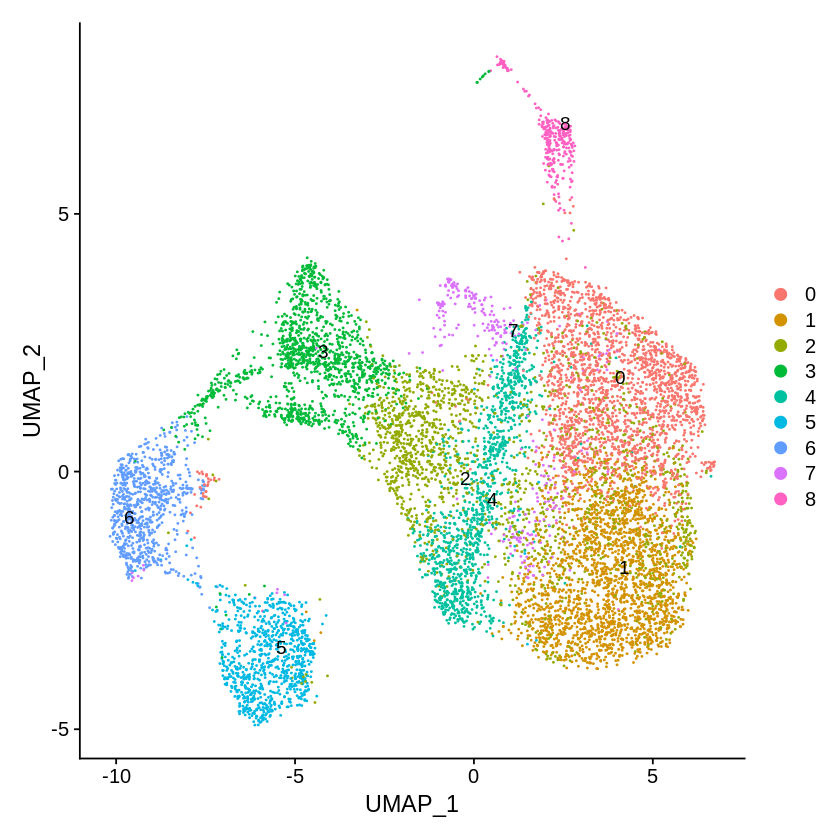

In [80]:
monocyte <- RunUMAP(monocyte, reduction = "pca", dims = 1:29)
monocyte <- FindNeighbors(monocyte, reduction = "pca", dims = 1:29)
monocyte <- FindClusters(monocyte, resolution = 0.5)
DimPlot(monocyte, reduction = "umap", label = TRUE, repel = TRUE)

In [ ]:
monocyte_marker <- c('FCGR3A','CD14','PLD4','CD1C','LILRA4','CD74','HLA-DRB1')

for (i in monocyte_marker) {
    print(FeaturePlot(monocyte, features = i, min.cutoff = "q9"))}

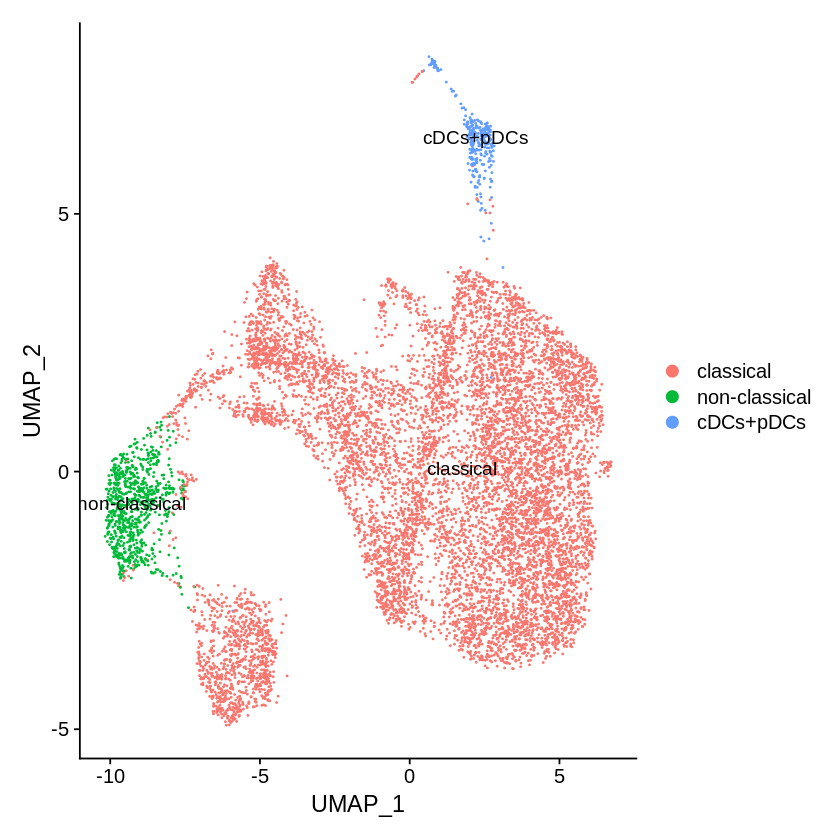

In [81]:
monocyte <- RenameIdents(object = monocyte, '0' = "classical", '1' = "classical", '2' = "classical", 
                         '3' = "classical", '4' = "classical", '5' = "classical",'6'='non-classical',
                         '7'='classical','8'='cDCs+pDCs')
DimPlot(monocyte, label = TRUE)

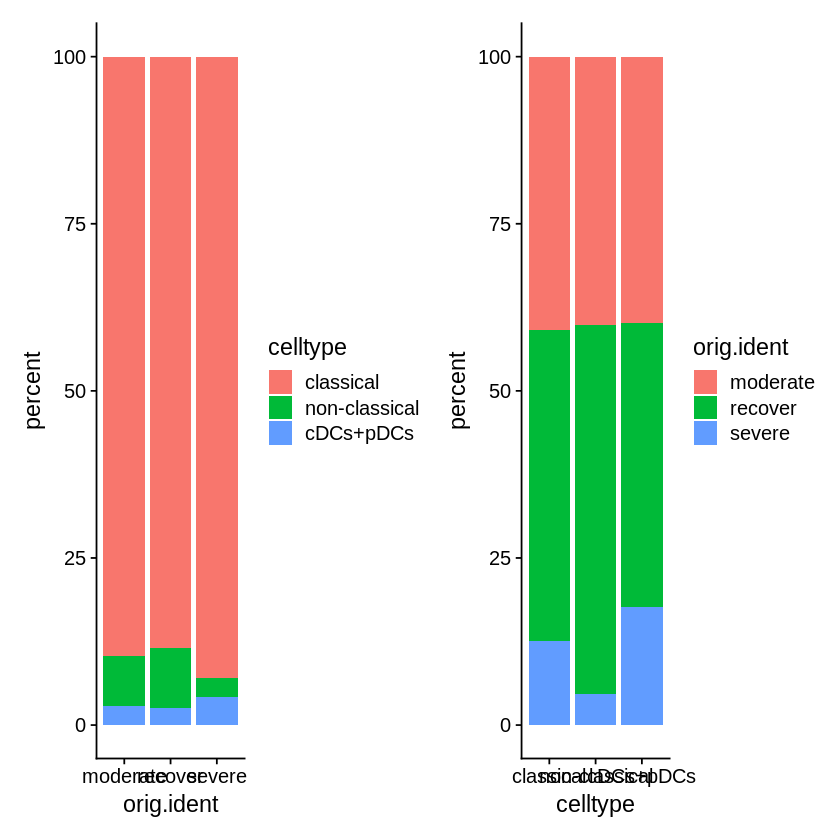

In [82]:
monocyte$celltype <- Idents(monocyte)
a<-monocyte@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(orig.ident) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup()
b<-monocyte@meta.data %>%
  dplyr::group_by(orig.ident, celltype) %>%
  dplyr::count() %>%
  dplyr::group_by(celltype) %>%
  dplyr::mutate(percent=100*n/sum(n)) %>%
  dplyr::ungroup()
ggplot(a,aes(x=orig.ident,y=percent, fill=celltype)) + geom_col() + ggplot(b,aes(x=celltype,y=percent, fill=orig.ident))+ geom_col() 

In [83]:
#analysis for classical monocyte
cmonocyte <- subset(monocyte, idents = 'classical')

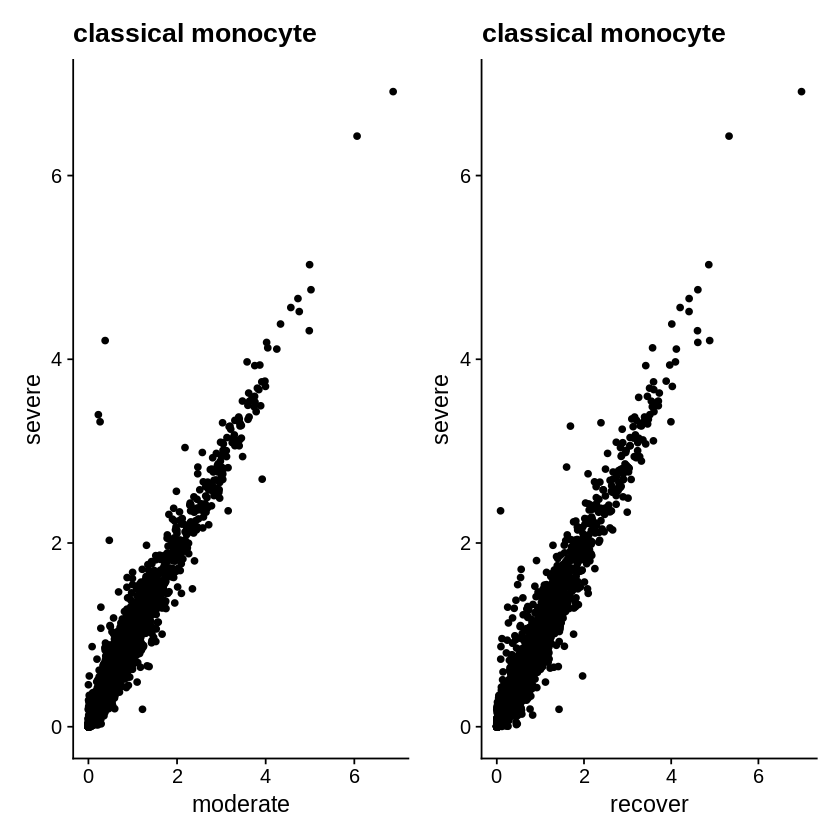

In [84]:
Idents(cmonocyte) <- "orig.ident"
avg.cmonocyte.cells <- as.data.frame(log1p(AverageExpression(cmonocyte, verbose = FALSE)$RNA))
avg.cmonocyte.cells$gene <- rownames(avg.cmonocyte.cells)
p1 <- ggplot(avg.cmonocyte.cells, aes(moderate, severe)) + geom_point() + ggtitle("classical monocyte")
p2 <- ggplot(avg.cmonocyte.cells, aes(recover, severe)) + geom_point() + ggtitle("classical monocyte")
p1+p2

In [546]:
cmonocyte.ms.DEG <- FindMarkers(cmonocyte, ident.1 = "severe", ident.2 = "moderate", verbose = FALSE, test.use = 'MAST')
cmonocyte.sr.DEG <- FindMarkers(cmonocyte, ident.1 = "severe", ident.2 = "recover", verbose = FALSE, test.use = 'MAST')
head(cmonocyte.ms.DEG, n = 15)
head(cmonocyte.ms.DEG, n = 15)


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



p_val         avg_log2FC pct.1 pct.2 p_val_adj    
AC020656.1  0.000000e+00 -1.7693037 0.322 0.891  0.000000e+00
HBA2        0.000000e+00  4.4093085 0.760 0.100  0.000000e+00
HBB         0.000000e+00  5.5197525 0.815 0.143  0.000000e+00
HIST1H1E    0.000000e+00  2.2477768 0.784 0.186  0.000000e+00
RPS26      9.071045e-321  1.2396395 0.915 0.857 1.860290e-316
HBA1       2.681737e-292  4.5773912 0.566 0.072 5.499706e-288
FCN1       3.880761e-182 -0.7776031 0.889 0.954 7.958664e-178
AC004556.1 1.502527e-177  0.6591806 0.220 0.000 3.081382e-173
CFD        2.169269e-172 -1.2205415 0.585 0.849 4.448738e-168
FKBP5      1.786703e-149  1.1349543 0.654 0.321 3.664170e-145
FTH1       1.760983e-145 -0.9707127 0.980 0.981 3.611424e-141
RPS4Y1     2.857310e-139 -1.4861492 0.034 0.366 5.859772e-135
HIST1H1D   1.411317e-127  1.1421146 0.412 0.106 2.894329e-123
LCP1       3.152783e-123  0.7144502 0.877 0.793 6.465727e-119
THBS1      2.126665e-122  1.4720538 0.355 0.079 4.361365e-118

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
AC020656.1  0.000000e+00 -1.7693037 0.322 0.891  0.000000e+00
HBA2        0.000000e+00  4.4093085 0.760 0.100  0.000000e+00
HBB         0.000000e+00  5.5197525 0.815 0.143  0.000000e+00
HIST1H1E    0.000000e+00  2.2477768 0.784 0.186  0.000000e+00
RPS26      9.071045e-321  1.2396395 0.915 0.857 1.860290e-316
HBA1       2.681737e-292  4.5773912 0.566 0.072 5.499706e-288
FCN1       3.880761e-182 -0.7776031 0.889 0.954 7.958664e-178
AC004556.1 1.502527e-177  0.6591806 0.220 0.000 3.081382e-173
CFD        2.169269e-172 -1.2205415 0.585 0.849 4.448738e-168
FKBP5      1.786703e-149  1.1349543 0.654 0.321 3.664170e-145
FTH1       1.760983e-145 -0.9707127 0.980 0.981 3.611424e-141
RPS4Y1     2.857310e-139 -1.4861492 0.034 0.366 5.859772e-135
HIST1H1D   1.411317e-127  1.1421146 0.412 0.106 2.894329e-123
LCP1       3.152783e-123  0.7144502 0.877 0.793 6.465727e-119
THBS1      2.126665e-122  1.4720538 0.355 0.079 4.361365e-118

In [547]:
write.table(cmonocyte.ms.DEG,file = 'cmonocyte.ms.DEG.txt',sep = '\t',row.names = TRUE)
write.table(cmonocyte.sr.DEG,file = 'cmonocyte.sr.DEG.txt',sep = '\t',row.names = TRUE)

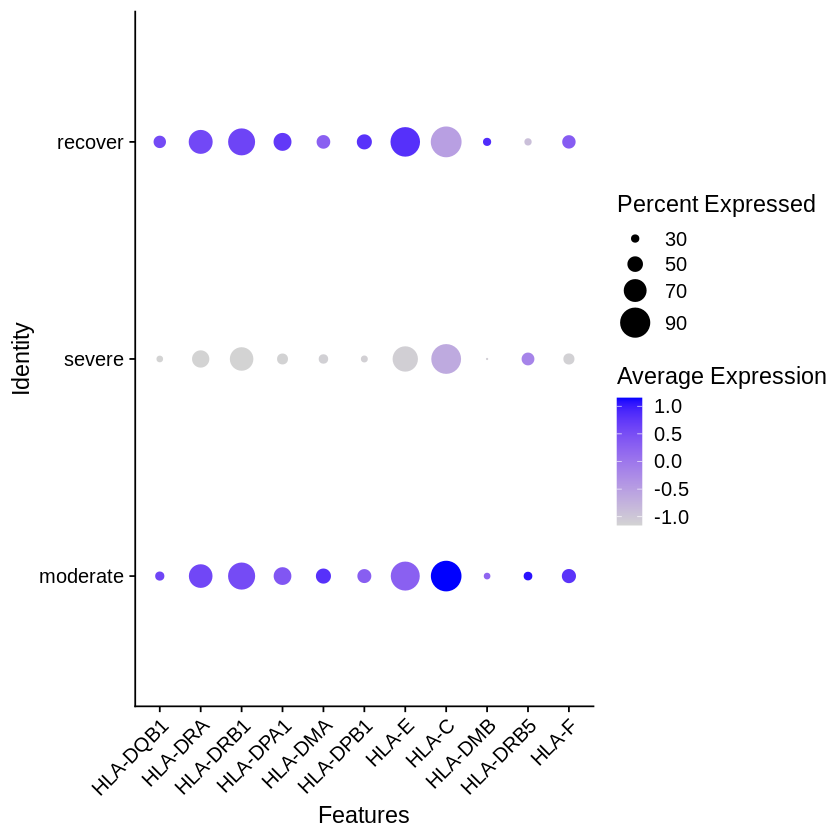

In [85]:
#compare antigen presenting gene expression by group
DefaultAssay(cmonocyte) <- "RNA"
cmonocyte.ck.markers <- c("HLA-DQB1",'HLA-DRA','HLA-DRB1','HLA-DPA1','HLA-DMA','HLA-DPB1','HLA-E','HLA-C','HLA-DMB','HLA-DRB5','HLA-F')
DotPlot(cmonocyte, features = cmonocyte.ck.markers, dot.scale = 8) + 
    RotatedAxis()

## save file for cellphoneDB(meta,counts file) by group

In [ ]:
#add scale.data
DefaultAssay(all.combined) <- "integrated"
all.combined <- ScaleData(all.combined, verbose = FALSE)
all.combined@assays$integrated@scale.data

In [454]:
moderate_object <- subset(all.combined , subset = orig.ident == "moderate")
severe_object <- subset(all.combined , subset = orig.ident == "severe")
recover_object <- subset(all.combined , subset = orig.ident == "recover")

In [460]:
#metafile - cell,celltype
write.table(moderate_object@meta.data['celltype'],'moderate_meta.txt',sep='\t')
write.table(severe_object@meta.data['celltype'],'severe_meta.txt',sep='\t')
write.table(recover_object@meta.data['celltype'],'recover_meta.txt',sep='\t')

In [462]:
moderate_assay <- GetAssayData(moderate_object,slot="scale.data")
severe_assay <- GetAssayData(severe_object,slot="scale.data")
recover_assay <- GetAssayData(recover_object,slot="scale.data")

In [463]:
#countfile - counts
write.table(moderate_assay,'moderate_counts.txt',sep='\t')
write.table(severe_assay,'severe_counts.txt',sep='\t')
write.table(recover_assay,'recover_counts.txt',sep='\t')